# ***Abstract***
This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

This notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset:

1. What are the data types? (Only numeric and categorical)

2. Are there missing values?

3. What are the likely distributions of the numeric variables?

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5. Which independent variables have missing data? How much?

6. Do the training and test sets have the same data?

7. In the predictor variables independent of all the other predictor variables?

8. Which predictor variables are the most important?

9. Do the ranges of the predictor variables make sense?

10. What are the distributions of the predictor variables?

11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.

## ***Dataset Overview***
Dataset "Breast Cancer" contains 4024 patients diagnosed of breast cancer from 2006 to 2010. Since survival time and status(i.e. Alive or Dead) are both dependent variables.
 1. 14 Independent Variables before DATA analyzing, including "Age", "Race", "Marital Status", "T Stage", "N Stage", "6th Stage", "Differentiate", Grade", "A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", "Reginol Node Positive". (Note that some variables may be disregarded after analyzing if they are not related to dependent variable or they are dependent on other variables).
 2. Dependent Variable -- Status (i.e. "Alive" or "Dead").
 3. The dependent variable is binary.
 4. There are a total of 4024 patients included in the dataset.


In [14]:
#Installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 45.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7165fc48eb46fafdb1122f327f7563ec83d303eb37cacfb04ffa2a2941435819
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [15]:
#Import packages and set certain settings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

%matplotlib inline   
%config InlineBackend.figure_format = 'retina' 

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

Load and read the dataset and store it in the variable "data".

In [16]:
data = pd.read_csv("Breast_Cancer.csv")
df = data

View the first couple of lines and have an overview of the dataset.

In [17]:
# data.drop('Survival Months', inplace=True, axis=1)

In [18]:
data.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

Check the info related to the dataset.


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Check if there is missing data.

In [20]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

No data is missing from any column, which means imputing or removing from data is not required.

For the numerical data, we assume it is normally distributed. Therefore, with a Q-Q Plot, from the scatterplot of our data and its goodness of fitting with the line, we can have a glance of our data and see if it is indeed normally distributed.

<Figure size 576x360 with 0 Axes>

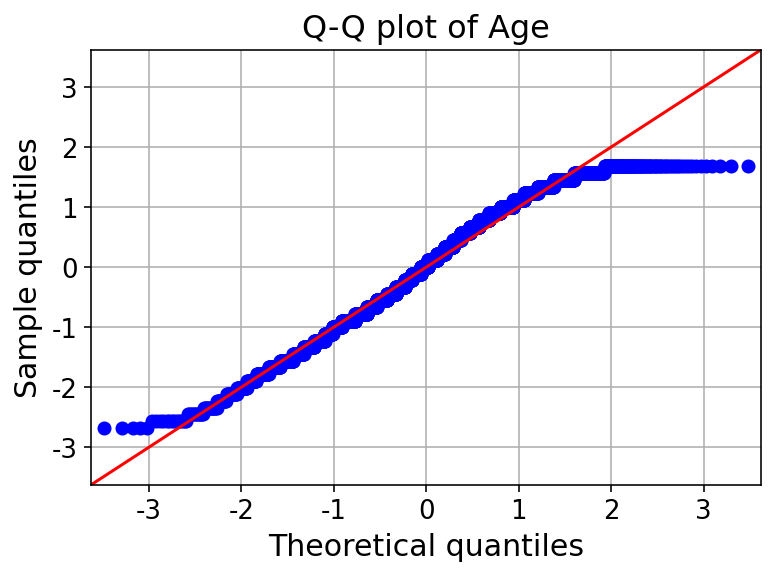

<Figure size 576x360 with 0 Axes>

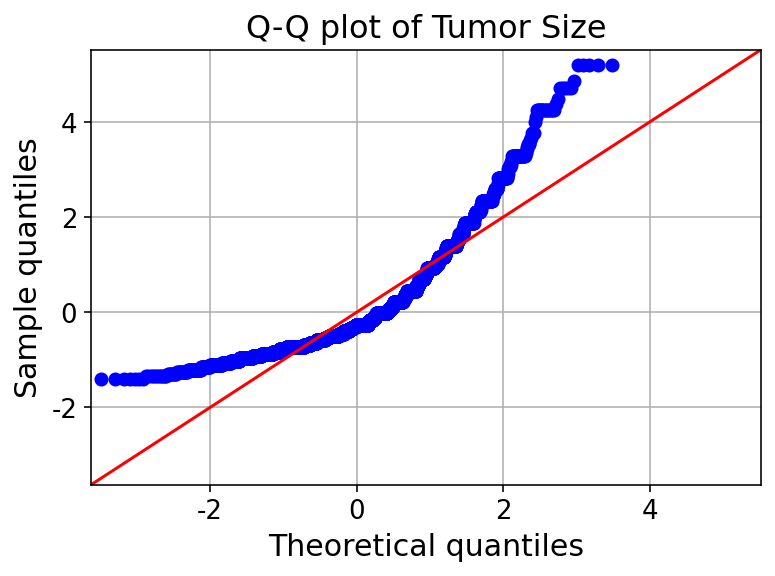

<Figure size 576x360 with 0 Axes>

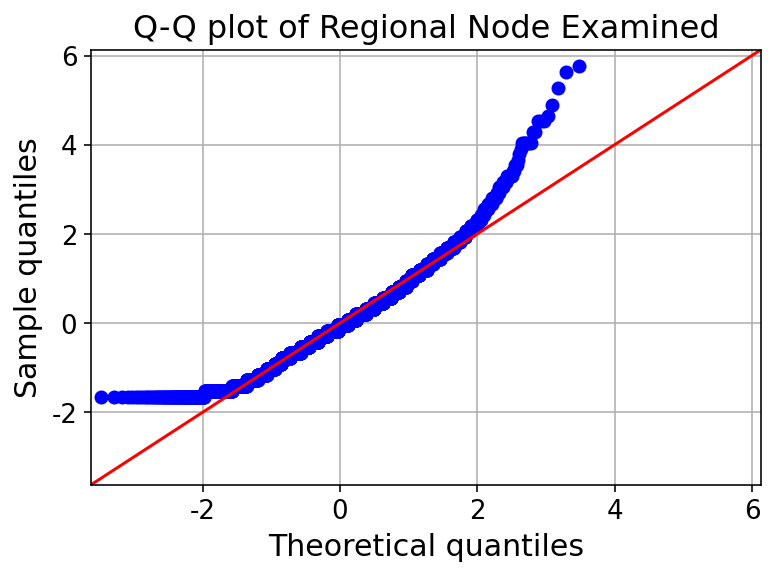

<Figure size 576x360 with 0 Axes>

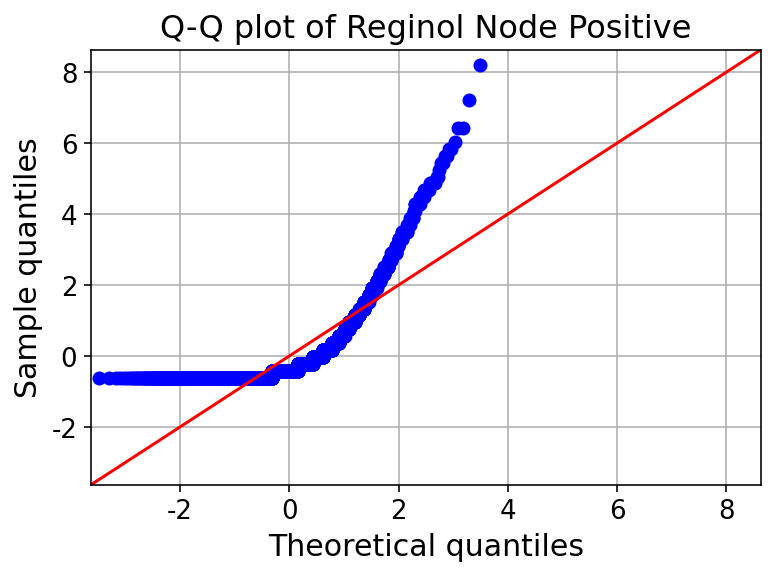

In [21]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1. Except for the independent variable, i.e., "Reginol Node Positive", the other three numerical indepent variables roughly follow the normal distribution with some outliers in the front and the end.
2. Therefore, I would like to further try to use the log function on the independent variable -- Reginol Node Positive, and see if it will follow the normal distribution.

<Figure size 576x360 with 0 Axes>

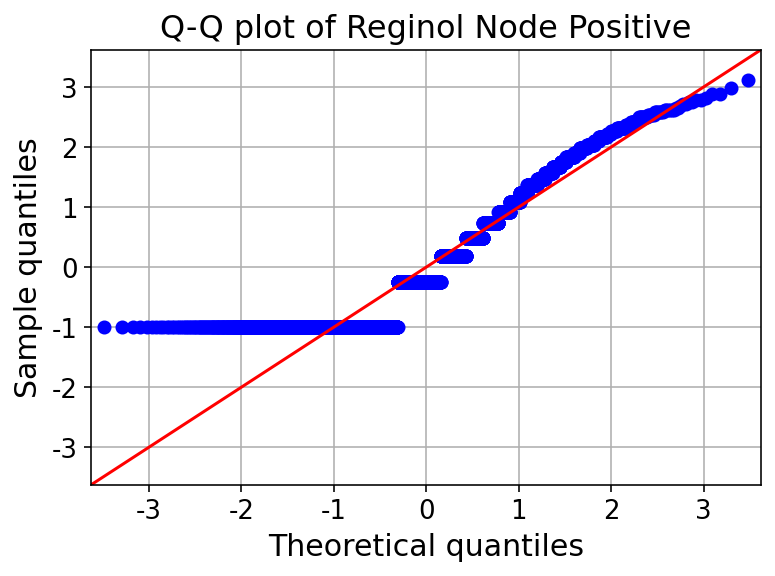

In [22]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Reginol Node Positive']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(np.log(data_norm[c]),line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

It turns out that with a log transformation, the independent variable follow the normal distribution much better, although there still are some outliers in the front.

For each categorical independent variable, calculate the number of each category and have an overview of its distribution.

1. Race

In [23]:
data['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

2. T Stage

In [24]:
data['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

3.N Stage

In [25]:
data['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

4. 6th Stage

In [26]:
data['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

5. Differentiate

In [27]:
data['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

6. Grade

In [28]:
data['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

Note in the category Grade, the classes 1,2,3,4 are denoted inconsistently, so here I would like to correct them and make them consistent.

In [29]:
data.loc[data['Grade'] == ' anaplastic; Grade IV', 'Grade'] = 'IV'
data.loc[data['Grade'] == '3', 'Grade'] = 'Ⅲ'
data.loc[data['Grade'] == '2', 'Grade'] = 'Ⅱ'
data.loc[data['Grade'] == '1', 'Grade'] = 'Ⅰ'

Check again and see if the classes are successfully corrected

In [30]:
data['Grade'].value_counts()

Ⅱ     2351
Ⅲ     1111
Ⅰ      543
IV      19
Name: Grade, dtype: int64

7. Marital Status

In [31]:
data['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

Check the number of different status for the dependent variable.

In [32]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

# ***Data Visualizing, Transforming, Feature Collection and Analysis***


For each numerical independent variable, a histogram and a boxplot are drawn to visualize the relationship between the independent variable and the dependent variable.

1. Age

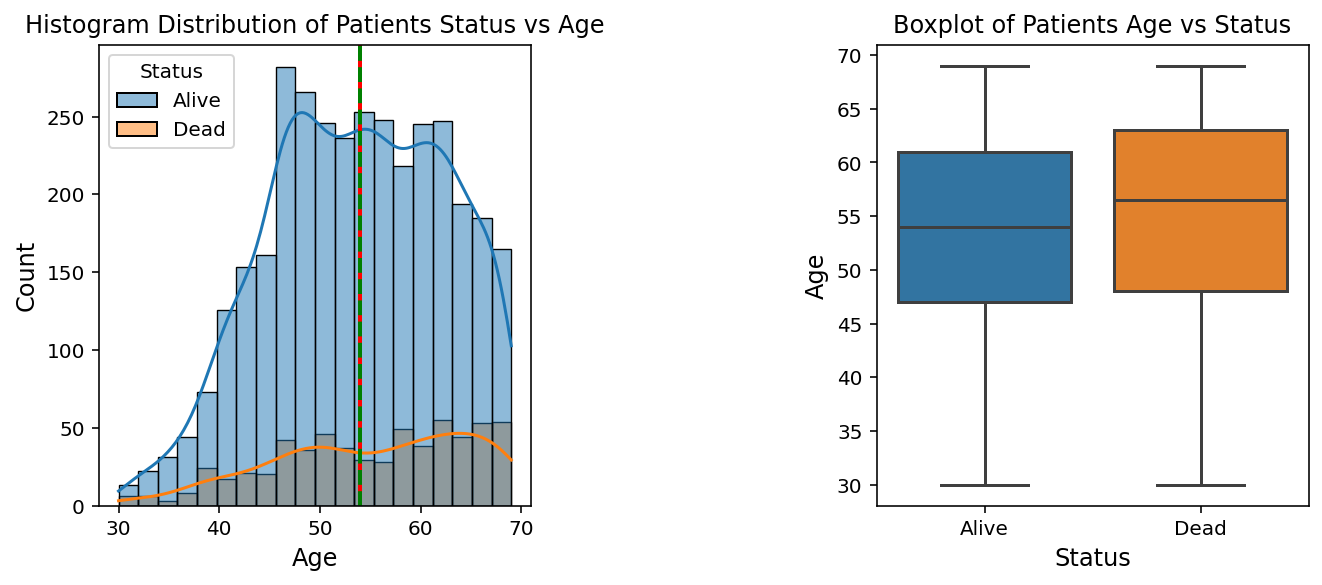

In [33]:
data = df
fig, ax = plt.subplots(1,2) 
ax1=ax[0]
ax2=ax[1] 


sns.histplot(data=data, x='Age', hue='Status',kde=True, bins=20, ax = ax1)
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Count", fontsize=12) 
ax1.axvline(data['Age'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(data['Age'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Age')

sns.boxplot(x='Status',y='Age', data=data, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Age", fontsize=12)
ax2.title.set_text('Boxplot of Patients Age vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2) # 调整子图布局
plt.show()

The number of diagnosed patients, alive patients and dead patients increase along with the age before 47 years old. After 47 years old, both alive and dead patients number have a tendency to decrease. However, as the age increases, the ratio of dead patients and alive patients increases, which means older patients are more likely to die from breast cancer than younger patients.

2. Tumor Size

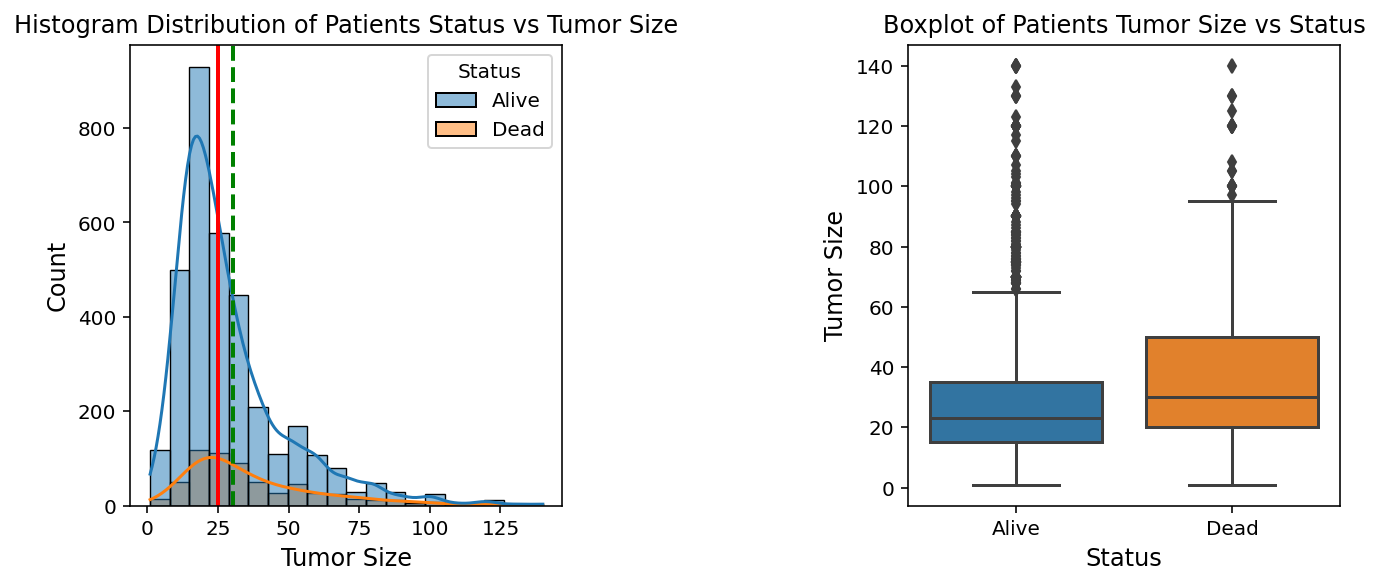

In [34]:
data = df
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=data, x='Tumor Size', hue='Status',bins=20, kde=True,ax=ax1) 
ax1.set_xlabel("Tumor Size", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(data['Tumor Size'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(data['Tumor Size'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Tumor Size')

sns.boxplot(x='Status',y='Tumor Size', data=data, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)
ax2.set_ylabel("Tumor Size", fontsize=12)
ax2.title.set_text('Boxplot of Patients Tumor Size vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()

The number of diagnosed patients and the dead patients of them achieve to a peak at a certain tumor size of 20mm. Therefore, we can infer that tumors with a size around 20mm are more dangerous than other sizes.

3. Regional Node Examined

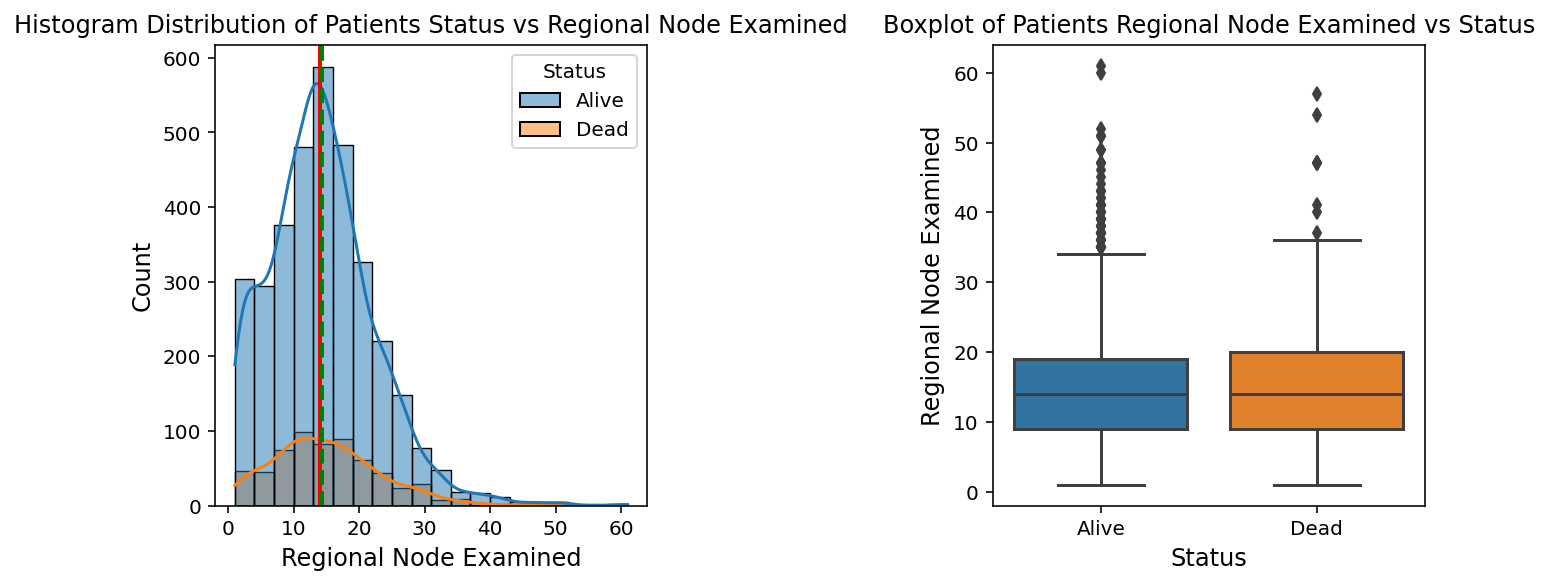

In [35]:
data = df
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=df, x='Regional Node Examined', hue='Status',bins=20,kde=True,ax=ax1 )  
ax1.set_xlabel("Regional Node Examined", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(df['Regional Node Examined'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Regional Node Examined'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Regional Node Examined')

sns.boxplot(x='Status',y='Regional Node Examined', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Regional Node Examined", fontsize=12)
ax2.title.set_text('Boxplot of Patients Regional Node Examined vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()

Similarly as tumor size, there also is a dangerous range of regional node examined, which means if 10-20 nodes are found in a certain region, it is more dangerous for a patient.

4. Reginol Node Positive

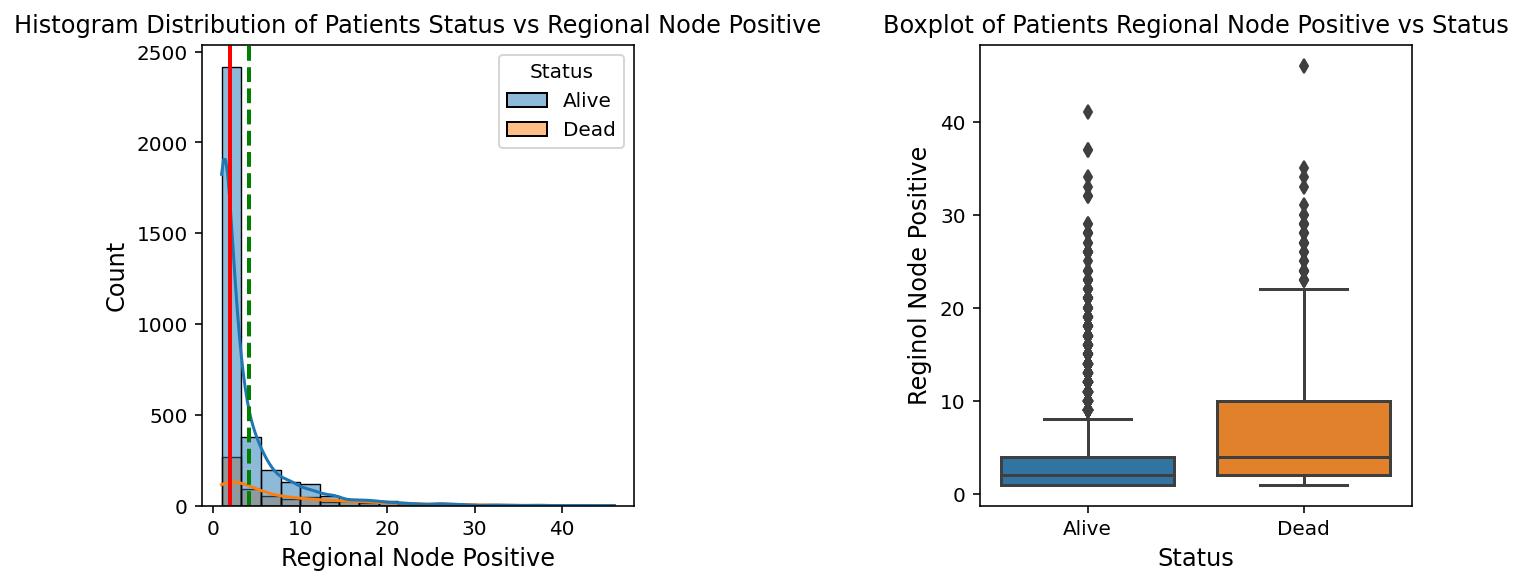

In [36]:
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=df, x='Reginol Node Positive', hue='Status',bins=20,kde=True, ax=ax1 )  
ax1.set_xlabel("Regional Node Positive", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(df['Reginol Node Positive'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Reginol Node Positive'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Regional Node Positive')

sns.boxplot(x='Status',y='Reginol Node Positive', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Reginol Node Positive", fontsize=12)
ax2.title.set_text('Boxplot of Patients Regional Node Positive vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()


In these two figures we can tell, as the number of positive nodes found in a certain region increases, the patients are more likely to die.

Get an overview of the ranges of numerical independent variables and dependent variable.

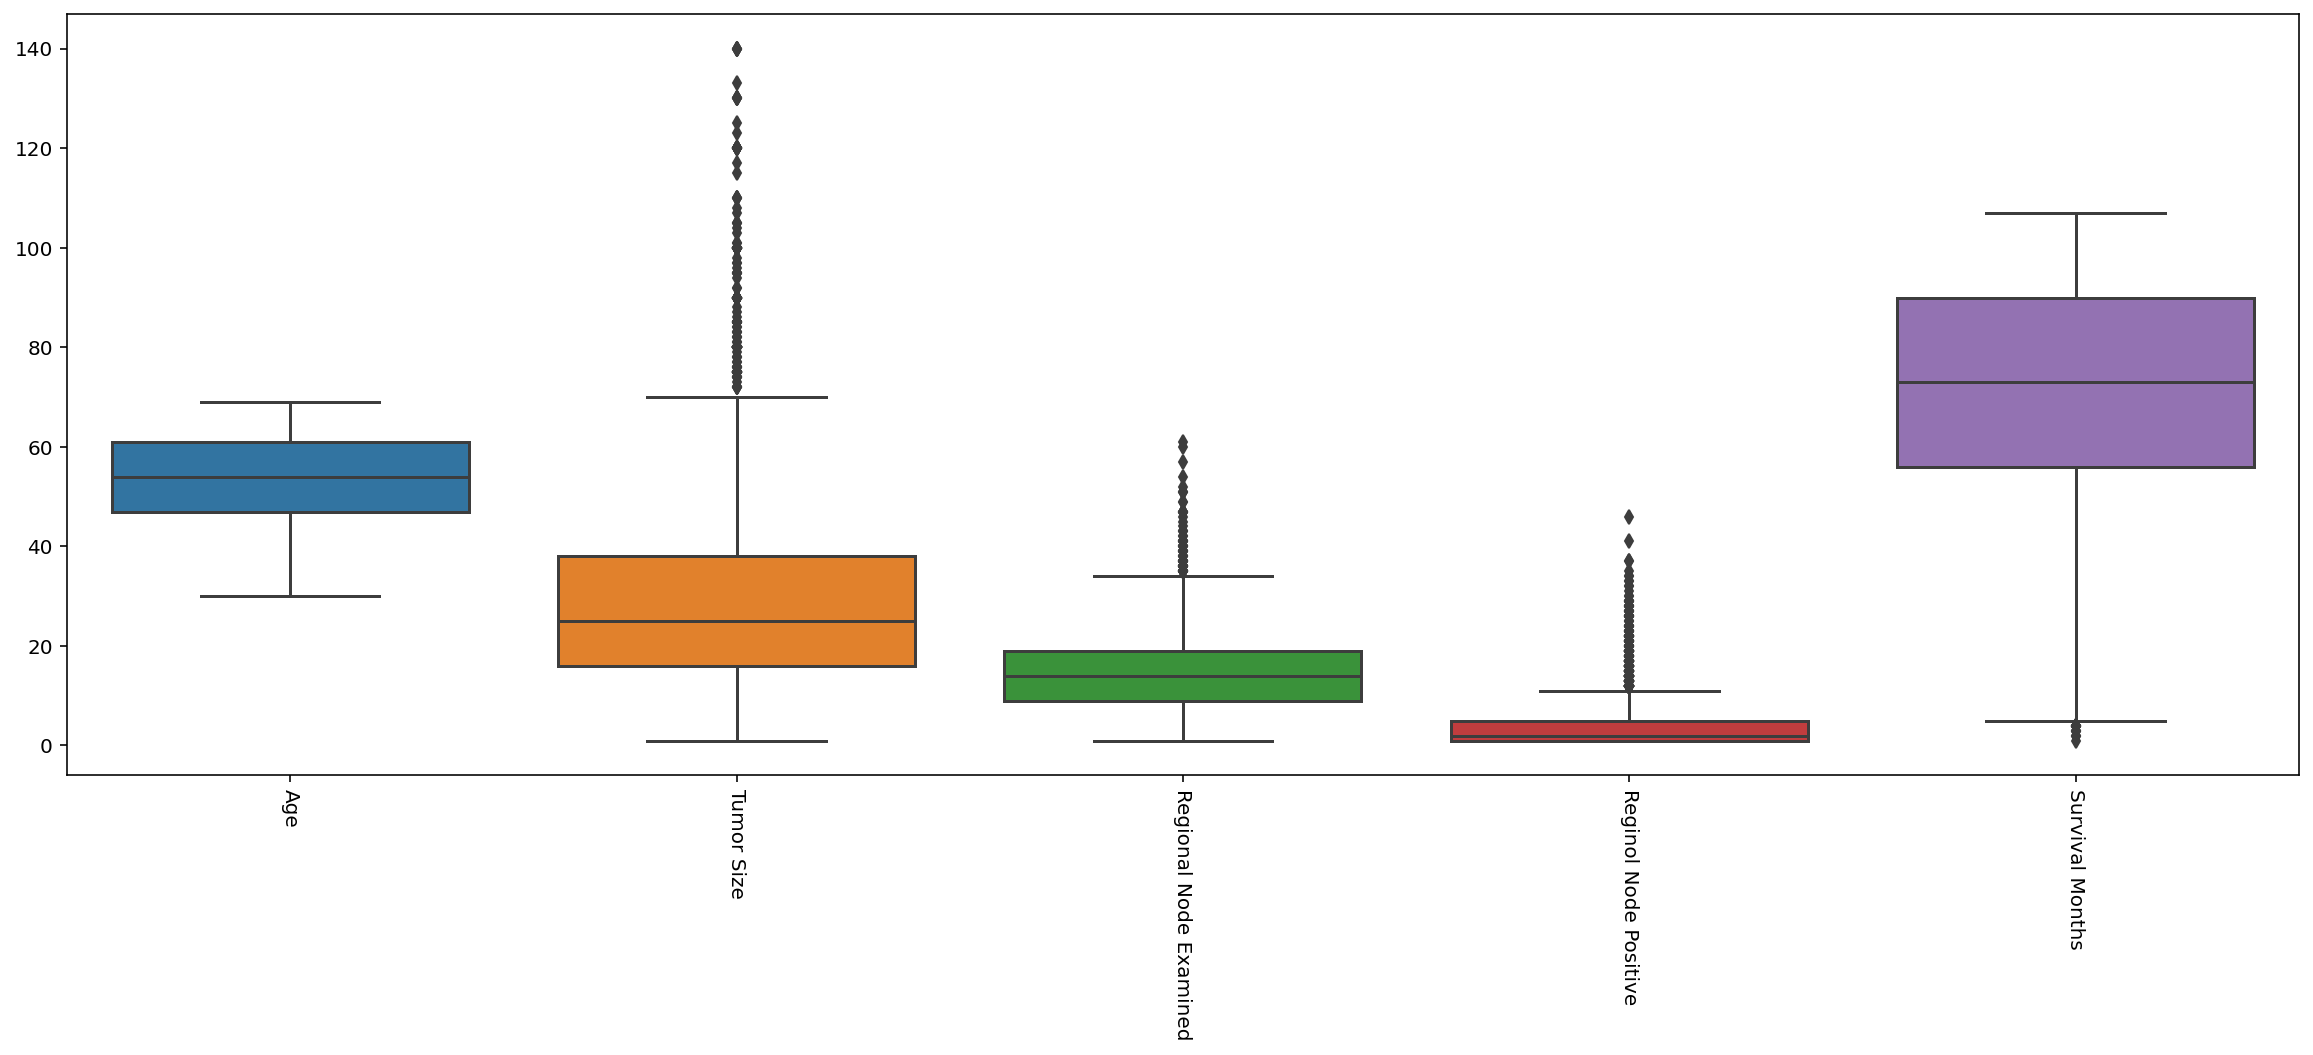

In [37]:
data = data
plt.figure(figsize=(20,7))
plt.xticks(rotation=270)
sns.boxplot(data=data)

***Analysis from the box plot***
1. There are no outliers in the independent variable 'Age', and the data concentrates between 45 to 61 years old, which makes sense because women are usually diagnosed of breast cancer at this age range.
2. There are several outliers in the independent variable 'Tumor Size' since there are patients diagnosed of breast cancer with extremely large tumor. 
3. Regional Node Examined means the total number of node found in a certain region. There are some outliers, which indicates that some patients have many tumors found in a region.
4. Reginol Node Positive means the positive node found in a certain region. The outliers in this box plot indicate that many more positive nodes are found in some patients than most patients.

Add categorical independent variables to visualize and interpret the data.

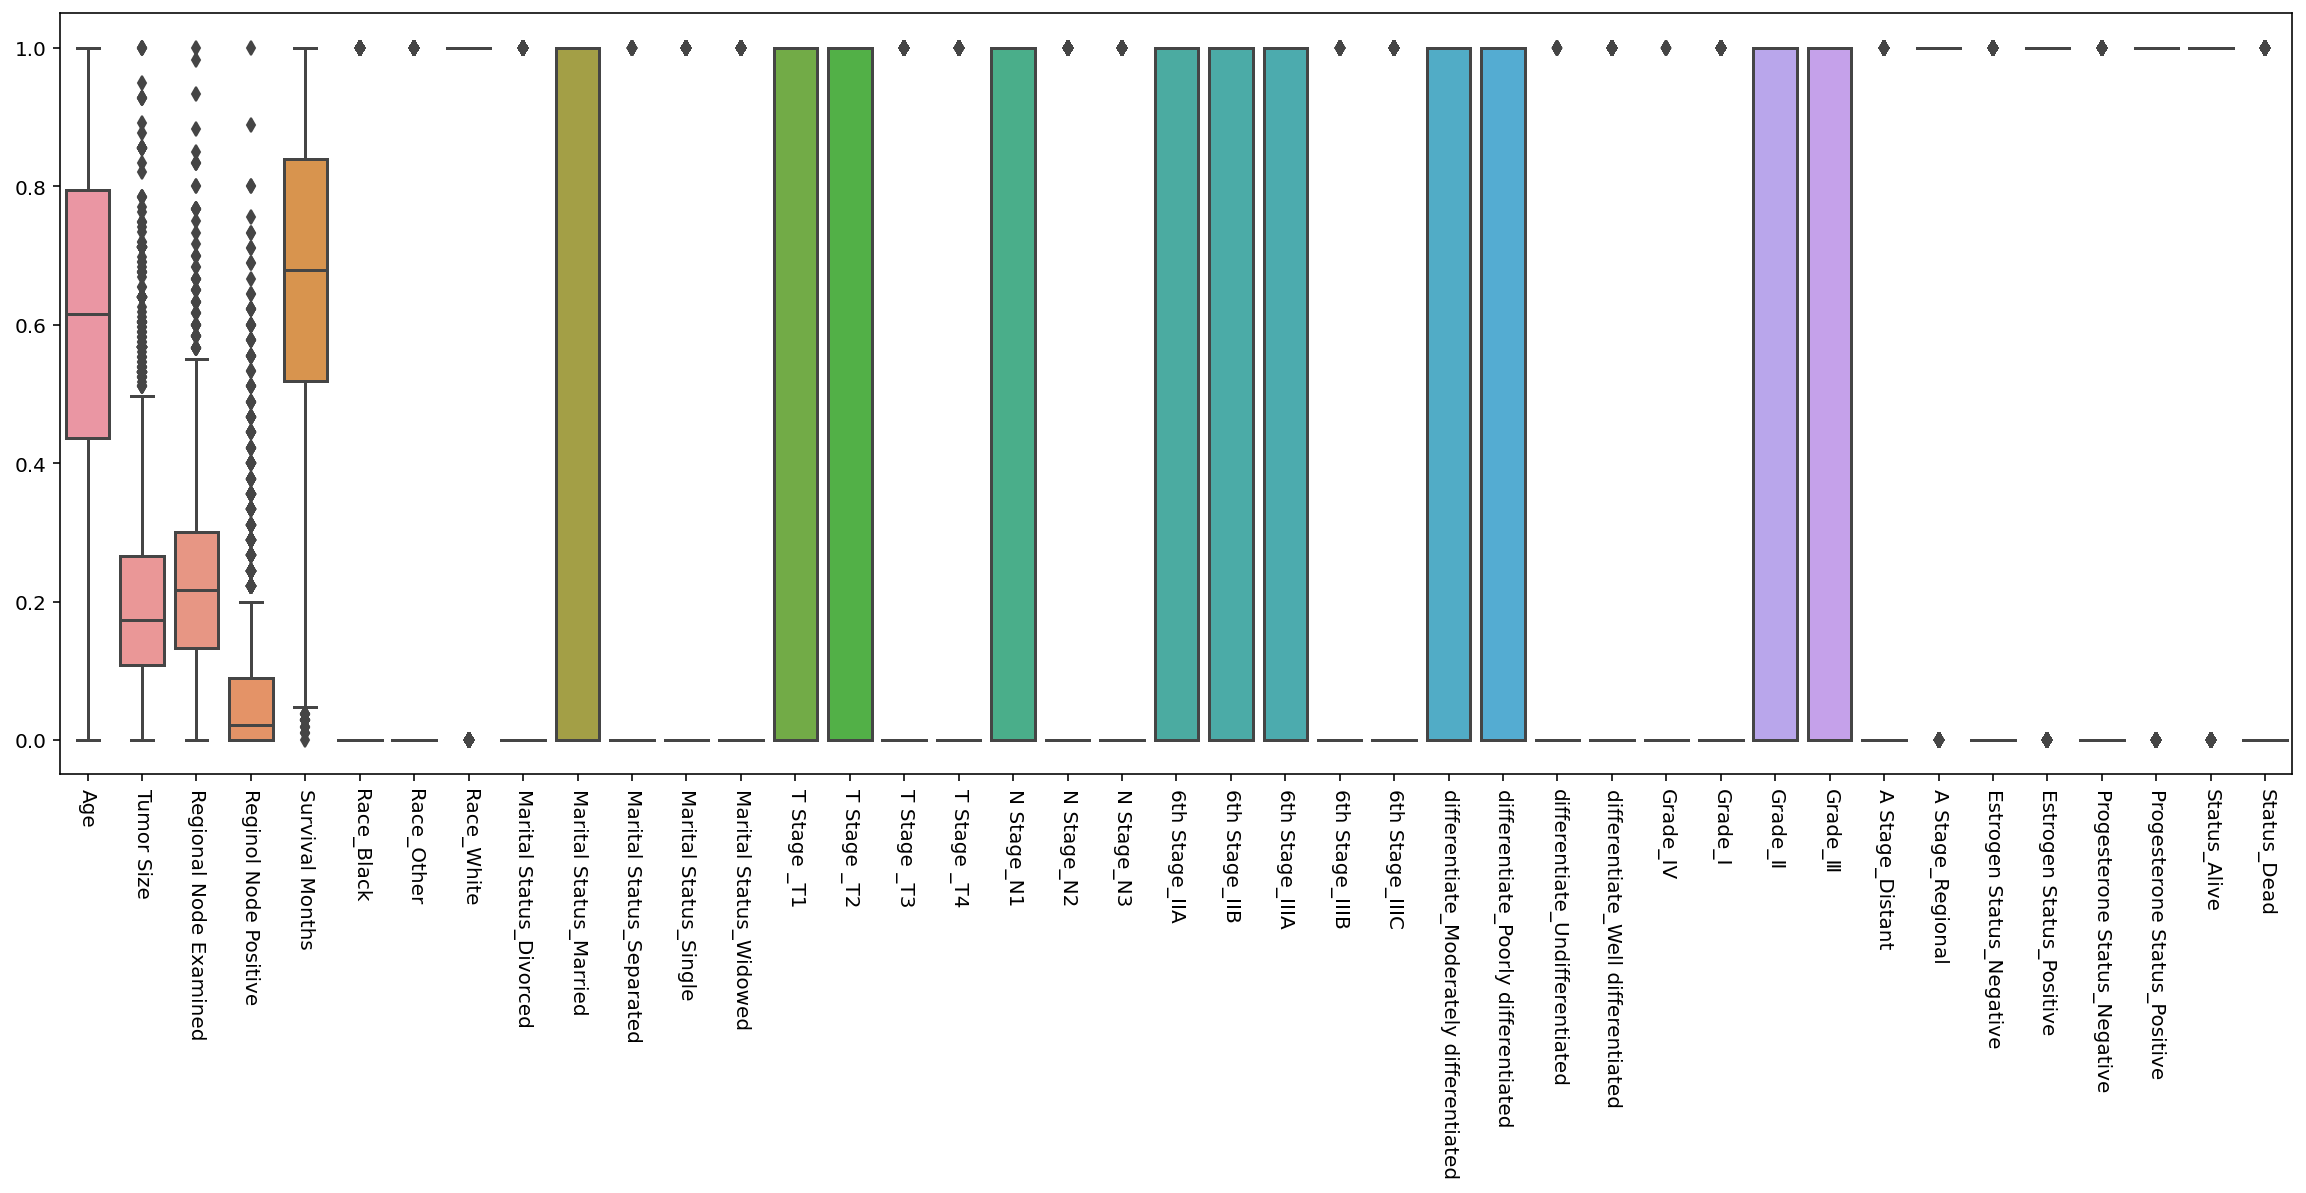

In [38]:
data = pd.get_dummies(data)
from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Age', 'Tumor Size','Regional Node Examined', 'Reginol Node Positive','Survival Months']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Age', 'Tumor Size','Regional Node Examined', 'Reginol Node Positive', 'Survival Months']] = pd.DataFrame(x_scaled)
plt.figure(figsize=(20,7))
plt.xticks(rotation=270)
sns.boxplot(data=data)

***Additional Analysis of the data***

From the boxplot, we can tell:
1. White women are more likely to be diagnosed of breast cancer.
2. Married women are more likely to be diagnosed of breast cancer than women in other marital status. 
3. The disease concentrates on some certain stage and differentiate level.

Checking the correlation between all the features in the data

In [39]:
data.corr()

Age  Tumor Size  \
Age                                      1.000000   -0.077215   
Tumor Size                              -0.077215    1.000000   
Regional Node Examined                  -0.033345    0.104352   
Reginol Node Positive                    0.012586    0.242322   
Survival Months                         -0.009390   -0.086901   
Race_Black                              -0.043348    0.000644   
Race_Other                              -0.083334    0.007283   
Race_White                               0.094113   -0.005955   
Marital Status_Divorced                  0.047953    0.020541   
Marital Status_Married                  -0.051305   -0.028056   
Marital Status_Separated                -0.028940   -0.001266   
Marital Status_Single                   -0.103948    0.015492   
Marital Status_Widowed                   0.209720    0.005053   
T Stage _T1                              0.061434   -0.622308   
T Stage _T2                             -0.017541    0.041831   
T Stage _T3                             -0.063654    0.746444   
T Stage _T4                              0.001383    0.196213   
N Stage_N1                               0.002378   -0.269523   
N Stage_N2                              -0.010476    0.146416   
N Stage_N3                               0.009664    0.207786   
6th Stage_IIA                            0.049955   -0.534645   
6th Stage_IIB                           -0.038351    0.004760   
6th Stage_IIIA                          -0.020129    0.369990   
6th Stage_IIIB                          -0.003280    0.146900   
6th Stage_IIIC                           0.009664    0.207786   
differentiate_Moderately differentiated  0.046329   -0.041800   
differentiate_Poorly differentiated     -0.093476    0.097969   
differentiate_Undifferentiated          -0.012730    0.044634   
differentiate_Well differentiated        0.058039   -0.076851   
Grade_IV                                -0.012730    0.044634   
Grade_Ⅰ                                  0.058039   -0.076851   
Grade_Ⅱ                                  0.046329   -0.041800   
Grade_Ⅲ                                 -0.093476    0.097969   
A Stage_Distant                         -0.020860    0.123883   
A Stage_Regional                         0.020860   -0.123883   
Estrogen Status_Negative                -0.059787    0.059585   
Estrogen Status_Positive                 0.059787   -0.059585   
Progesterone Status_Negative             0.021269    0.069879   
Progesterone Status_Positive            -0.021269   -0.069879   
Status_Alive                            -0.055921   -0.134205   
Status_Dead                              0.055921    0.134205   

                                         Regional Node Examined  \
Age                                                   -0.033345   
Tumor Size                                             0.104352   
Regional Node Examined                                 1.000000   
Reginol Node Positive                                  0.411580   
Survival Months                                       -0.022054   
Race_Black                                            -0.001530   
Race_Other                                             0.012898   
Race_White                                            -0.008620   
Marital Status_Divorced                                0.015391   
Marital Status_Married                                -0.009878   
Marital Status_Separated                               0.007275   
Marital Status_Single                                 -0.008240   
Marital Status_Widowed                                 0.007993   
T Stage _T1                                           -0.111722   
T Stage _T2                                            0.052942   
T Stage _T3                                            0.071209   
T Stage _T4                                            0.027053   
N Stage_N1                                            -0.282779   
N Stage_N2                                

Plot the heat map of the correlation

Text(0.5, 1.0, 'Heat Map of the Correlation Between All the Features')

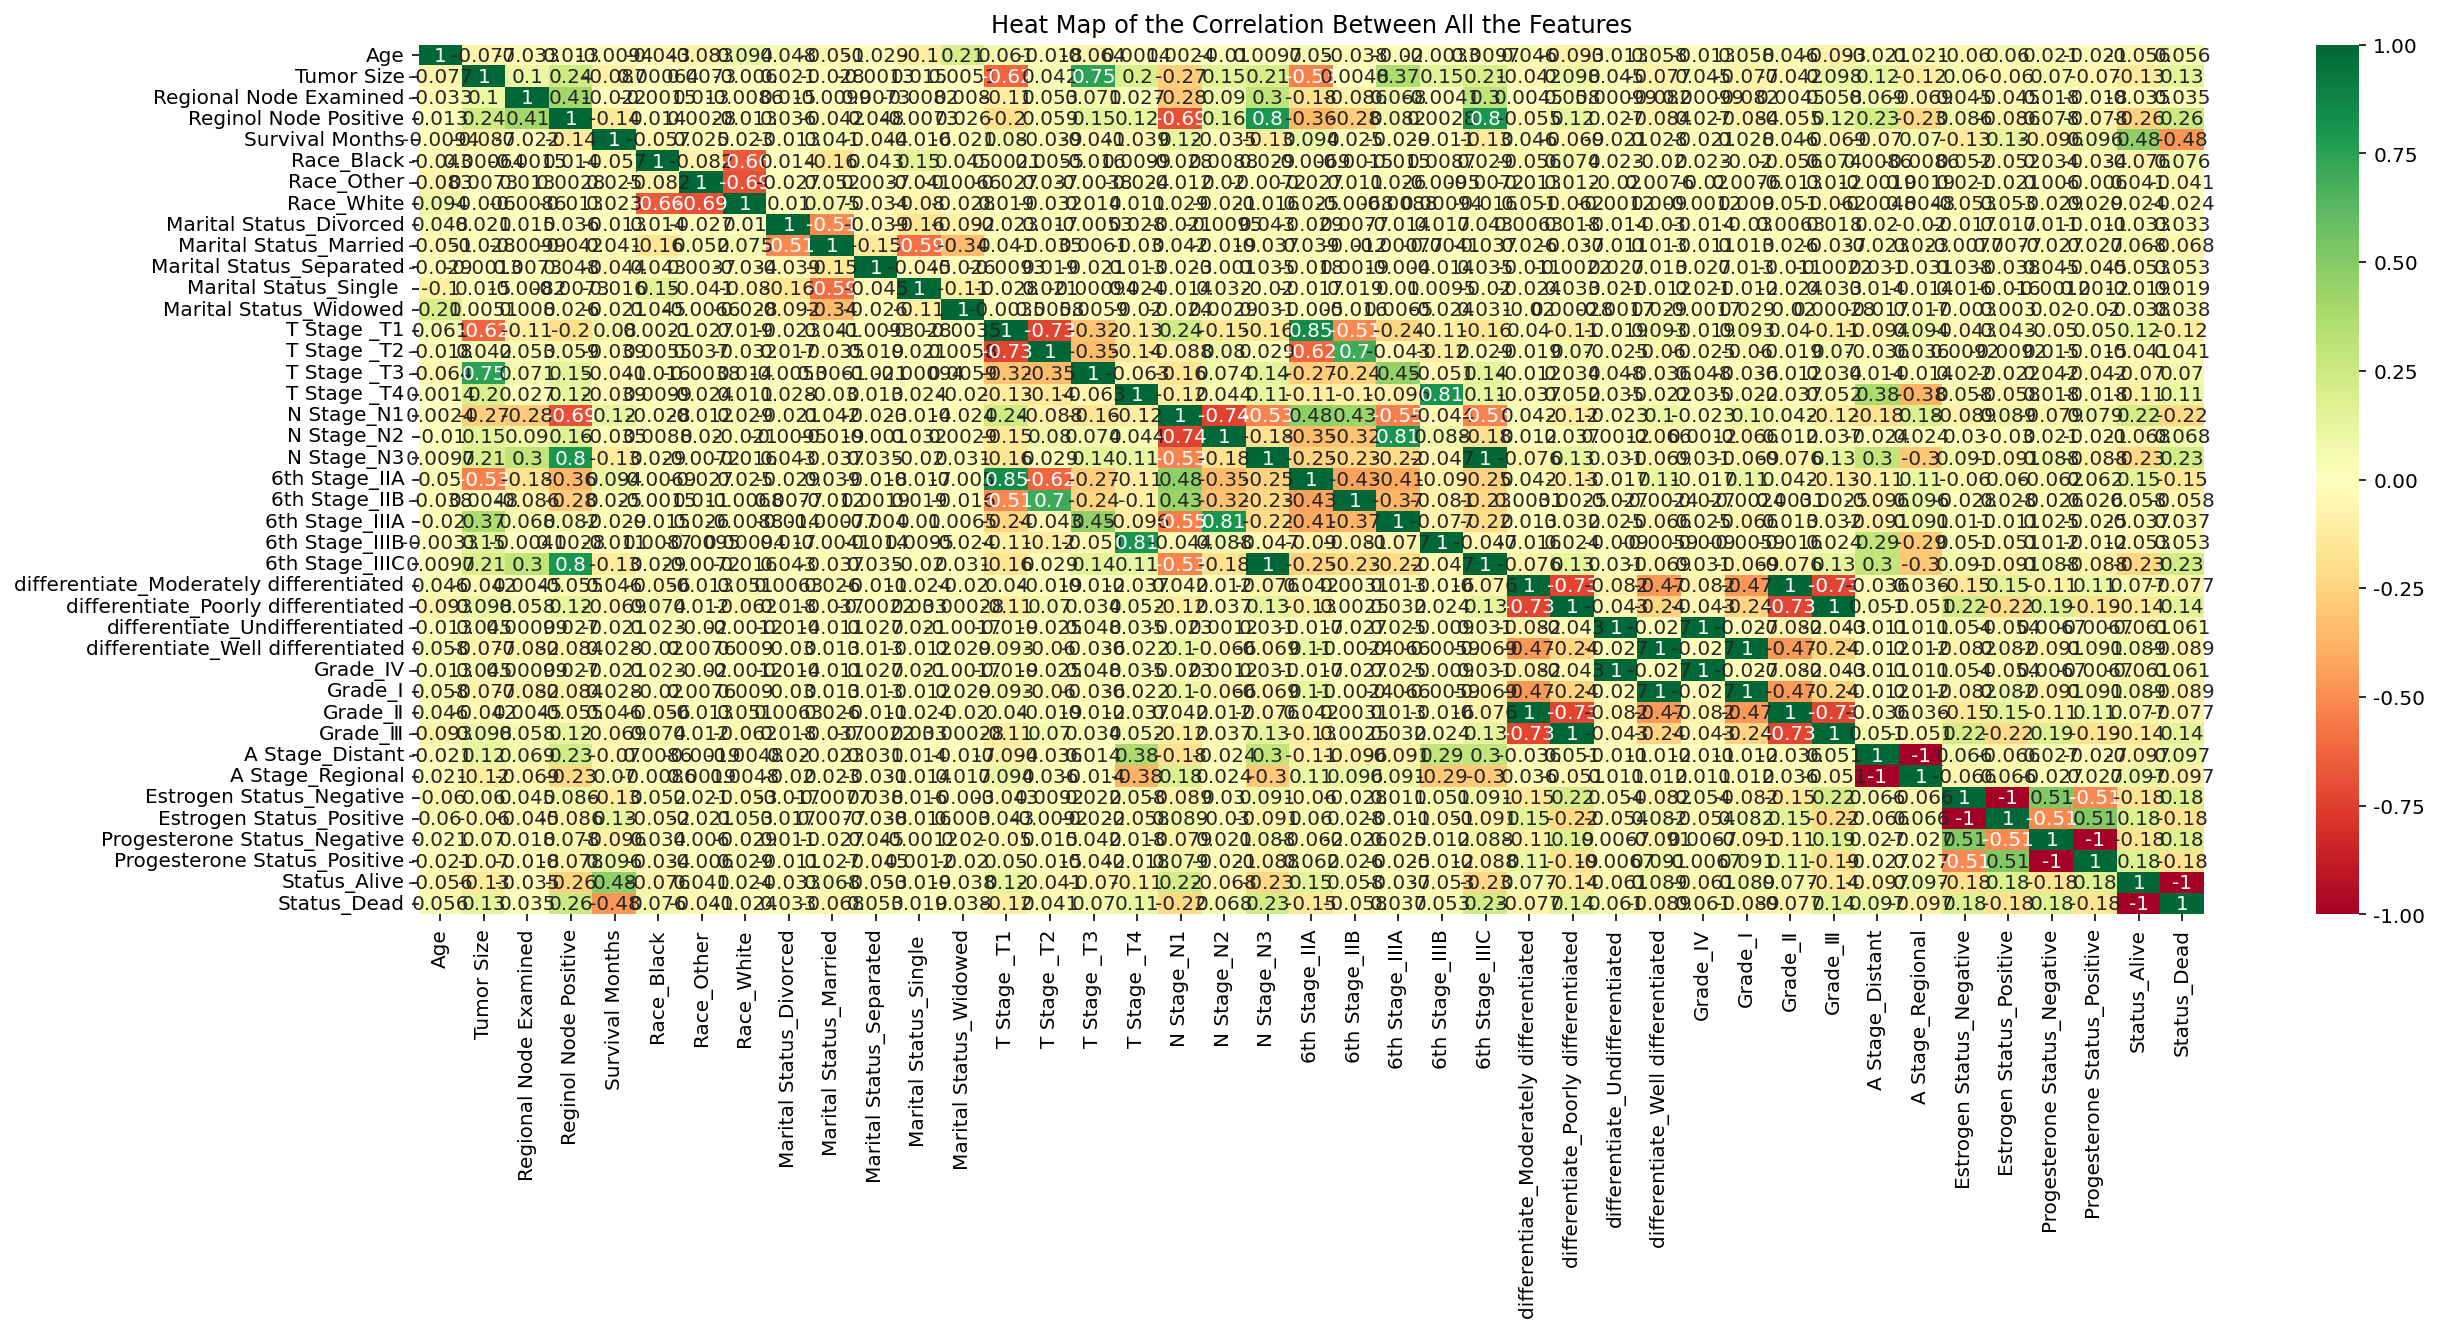

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title('Heat Map of the Correlation Between All the Features')

Most of the variables are not correlated, but the Grade and the differentiate are closely correlated, for example, the correlation between "moderately differentiate" and "Grade 2", "pooly differentiate" and "Grade 3", "undifferentiate" and "Grade 4", "well differentiate" and "Grade 1" are all 1, which indicates these two independent variables are actually the same thing.

In [41]:
#pair plot to check the colinearity
sns.pairplot(data) 

The Regional Node Positive is linearly related to Regional Node Examined, which indicates that more nodes are found in a region, more positive nodes are found as well.

# ***Identifying Predictor Significande***


In [42]:
import statsmodels.api as sm

model = sm.OLS(data['Status_Alive'], data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'Grade_IV', 'Grade_Ⅰ', 'Grade_Ⅱ', 'Grade_Ⅲ', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Status_Alive   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     70.77
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.15e-295
Time:                        01:39:29   Log-Likelihood:                -862.23
No. Observations:                4024   AIC:                             1776.
Df Residuals:                    3998   BIC:                             1940.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Age                                        -0.0923      0.022     -4.274      0.000      -0.135      -0.050
Tumor Size                                  0.0284      0.064      0.444      0.657      -0.097       0.154
Regional Node Examined                      0.1719      0.039      4.429      0.000       0.096       0.248
Reginol Node Positive                      -0.4489      0.086     -5.223      0.000      -0.617      -0.280
Survival Months                             0.7023      0.022     31.299      0.000       0.658       0.746
Race_Black                                 -0.0154      0.014     -1.093      0.274      -0.043       0.012
Race_Other                                  0.0588      0.014      4.251      0.000       0.032       0.086
Race_White                                  0.0303      0.009      3.240      0.001       0.012       0.049
Marital Status_Divorced                     0.0206      0.015      1.377      0.169      -0.009       0.050
Marital Status_Married                      0.0412      0.011      3.632      0.000       0.019       0.063
Marital Status_Separated                   -0.0371      0.037     -1.002      0.316      -0.110       0.035
Marital Status_Single                       0.0304      0.014      2.167      0.030       0.003       0.058
Marital Status_Widowed                      0.0186      0.019      0.971      0.332      -0.019       0.056
T Stage _T1                                 0.0963      0.023      4.101      0.000       0.050       0.142
T Stage _T2                                 0.0656      0.018      3.690      0.000       0.031       0.101
T Stage _T3                                 0.0091      0.025      0.369      0.713      -0.039       0.058
T Stage _T4                                -0.0973      0.041     -2.354      0.019      -0.178      -0.016
N Stage_N1                                  0.0730      0.014      5.258      0.000       0.046       0.100
N Stage_N2                                 -0.0054      0.016     -0.340      0.734      -0.037       0.026
N Stage_N3                                  0.0062      0.012      0.526      0.599      -0.017       0.029
6th Stage_IIA                              -0.0165      0.024     -0.681      0.496      -0.064       0.031
6th Stage_IIB                              -0.0142      0.022     -0.648      0.517      -0.057       0.029
6th Stage_IIIA                              0.0466      0.022      2.130      0.033       0.004       0.090
6th Stage_IIIB                              0.0517      0.050      1.028      0.304      -0.047       0.150
6th Stage_IIIC                              0.0062      0.012      0.526      0.599      -0.017       0.029
differentiate_Moderately differentiated     0.0458      0.0

The **Age** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Tumor Size** has the p-value 0.657, which is greater and hence it is a non significant feature.

The **Regional Node Examined** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Regional Node Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Survival Months** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Race_Black** has the p-value 0.274, which is greater and hence it is a non significant feature.

The **Race_Other** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Race_White** has the p-value 0.001, which is lesser and hence it is a significant feature.

The **Marital Status_Divorced** has the p-value 0.169, which is greater and hence it is a non significant feature.

The **Marital Status_Married** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Marital Status_Separated** has the p-value 0.316, which is greater and hence it is a non significant feature.

The **Marital Status_Single** has the p-value 0.030, which is greater and hence it is a non significant feature.

The **Marital Status_Widowed** has the p-value 0.332, which is greater and hence it is a non significant feature.

The **T Stage_T1** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **T Stage_T2** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **T Stage_T3** has the p-value 0.713, which is greater and hence it is a non significant feature.

The **T Stage_T4** has the p-value 0.019, which is greater and hence it is a non significant feature.

The **N Stage_N1** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **N Stage_N2** has the p-value 0.734, which is greater and hence it is a non significant feature.

The **N Stage_N3** has the p-value 0.599, which is greater and hence it is a non significant feature.

The **6th Stage_IIA** has the p-value 0.496, which is greater and hence it is a non significant feature.

The **6th Stage_IIB** has the p-value 0.517, which is greater and hence it is a non significant feature.

The **6th Stage_IIIA** has the p-value 0.033, which is greater and hence it is a non significant feature.

The **6th Stage_IIIB** has the p-value 0.304, which is greater and hence it is a non significant feature.

The **6th Stage_IIIA** has the p-value 0.599, which is greater and hence it is a non significant feature.

The **differentiate_Moderately differentiated** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **differentiate_Poorly differentiated** has the p-value 0.008, which is greater and hence it is a non significant feature.

The **differentiate Undifferentiated** has the p-value 0.028, which is greater and hence it is a non significant feature.

The **differentiate_Well differentiated** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_IV** has the p-value 0.028, which is greater and hence it is a non significant feature.

The **Grade_I** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_II** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_III** has the p-value 0.008, which is greater and hence it is a non significant feature.

The **A Stage_Distant** has the p-value 0.018, which is greater and hence it is a non significant feature.

The **A Stage_Regional** has the p-value 0.143, which is greater and hence it is a non significant feature.

The **Estrogen Status_Negative** has the p-value 0.691, which is greater and hence it is a non significant feature.

The **Estrogen Status_Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Progesterone Status_Negative** has the p-value 0.756, which is greater and hence it is a non significant feature.

The **Progesterone Status_Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.


# ***Building The Model***
Train, Validation and Test Set Split

In [43]:
from sklearn.model_selection import train_test_split

X = data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]

y = data['Status_Alive']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

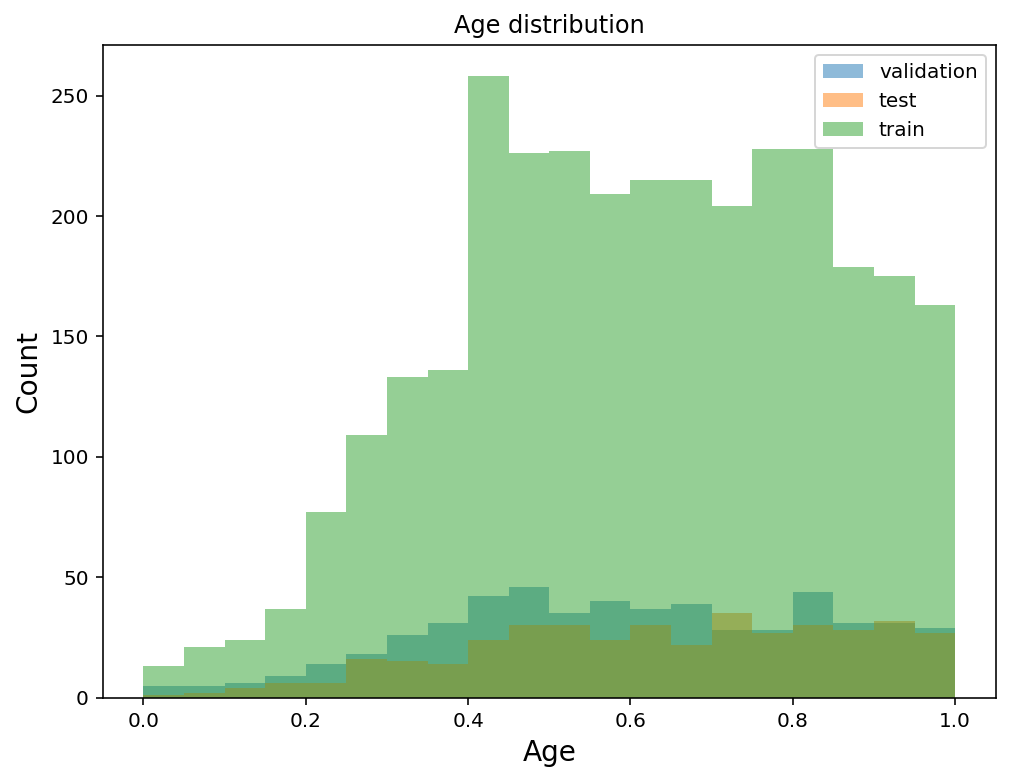

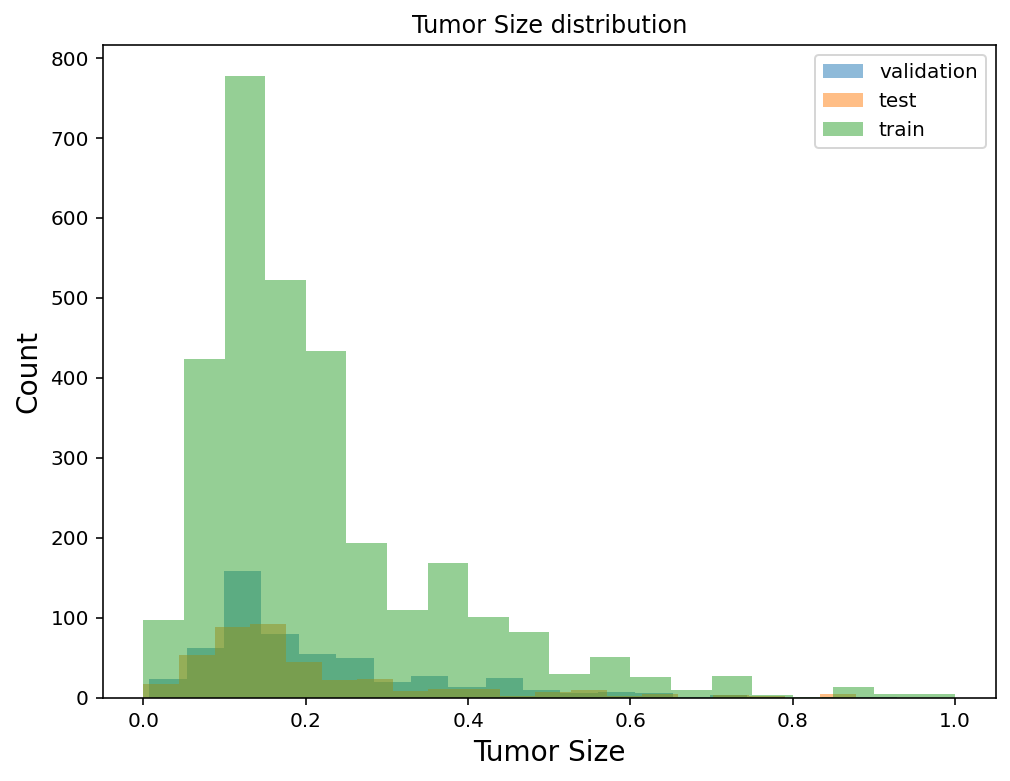

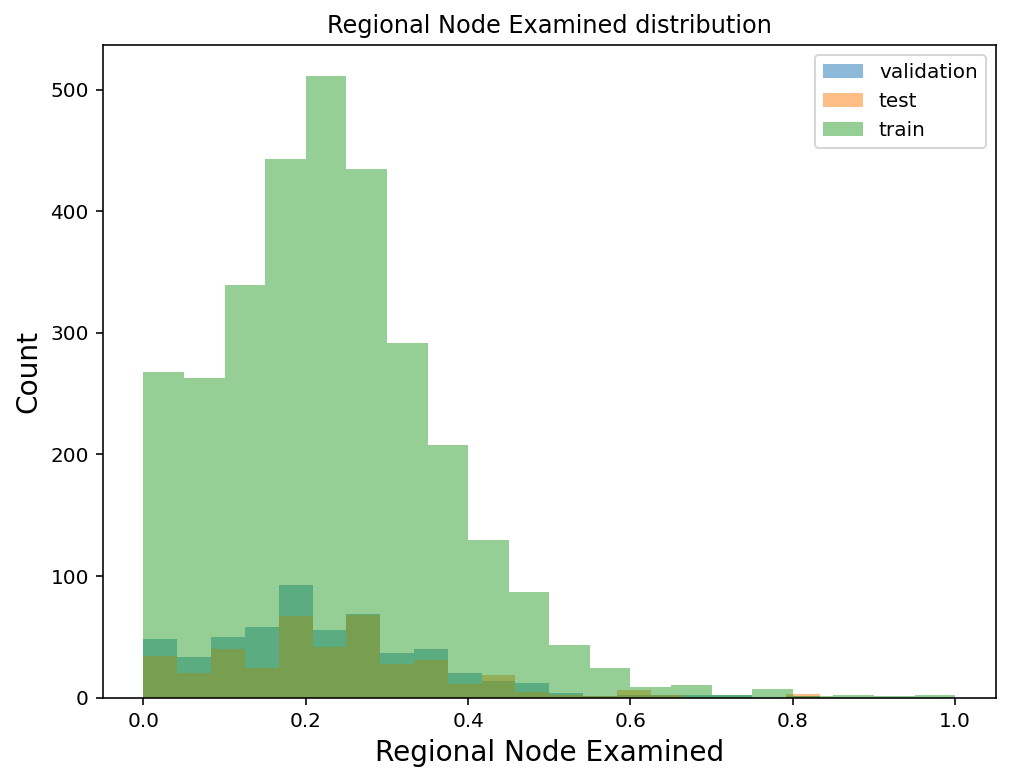

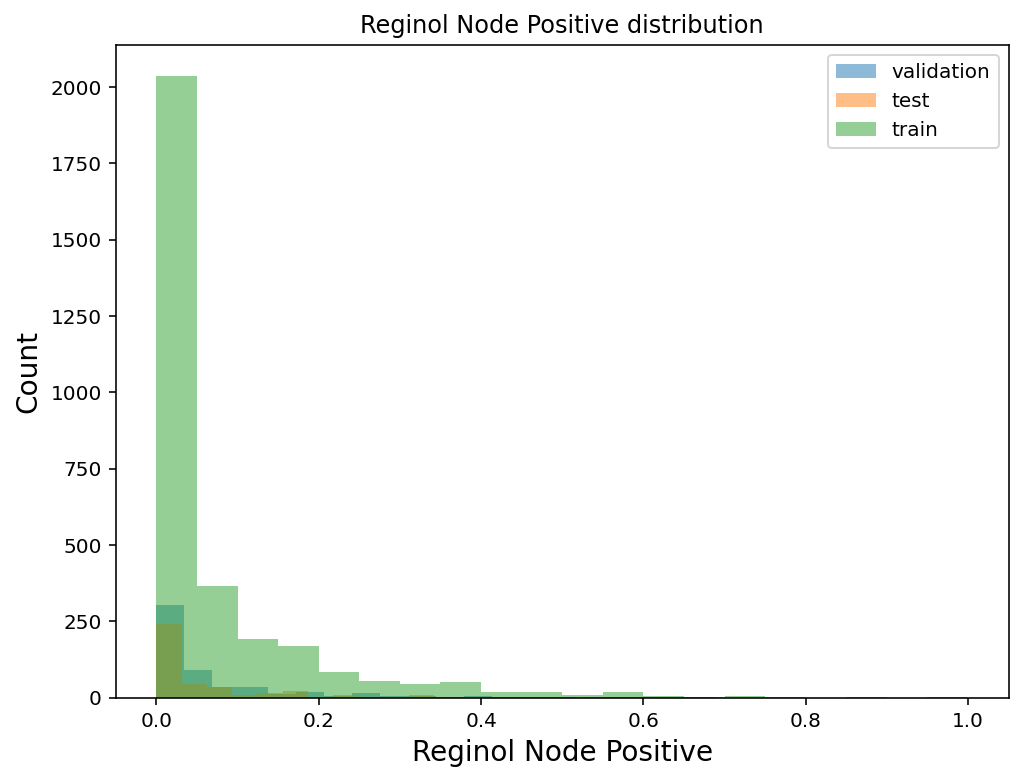

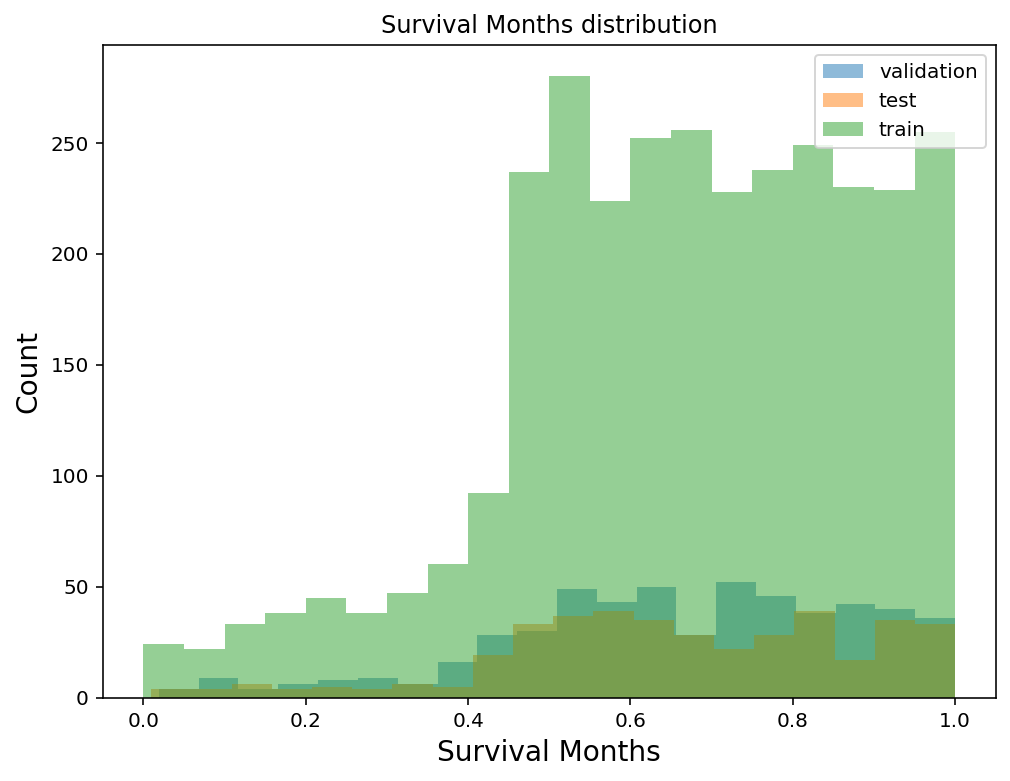

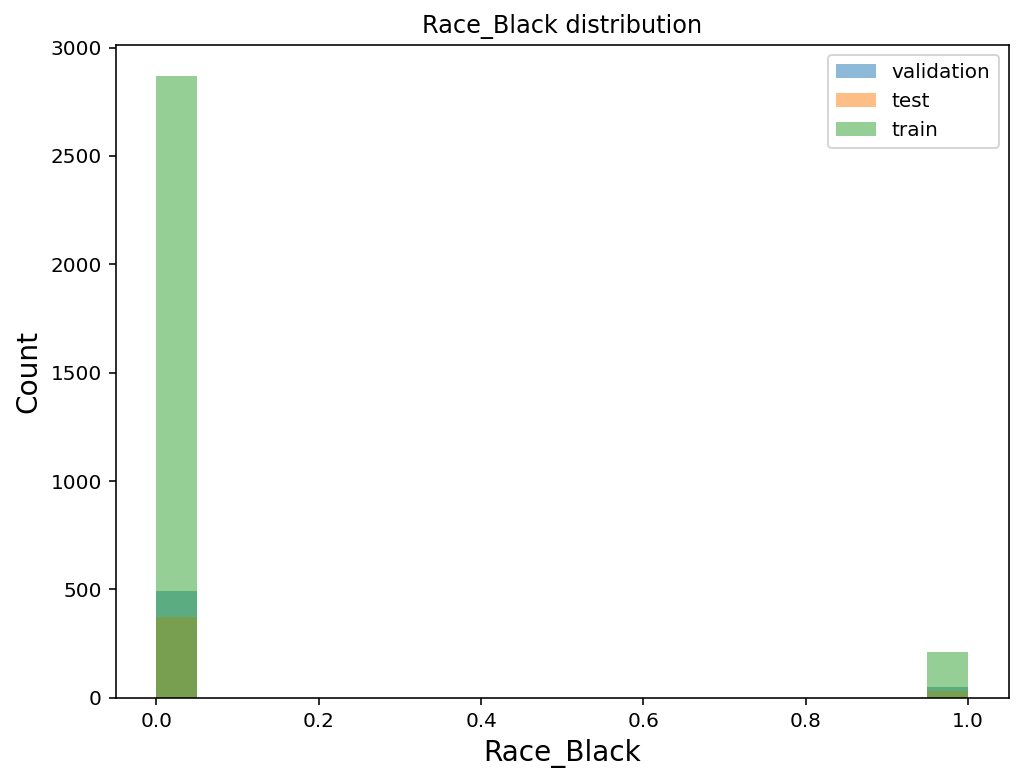

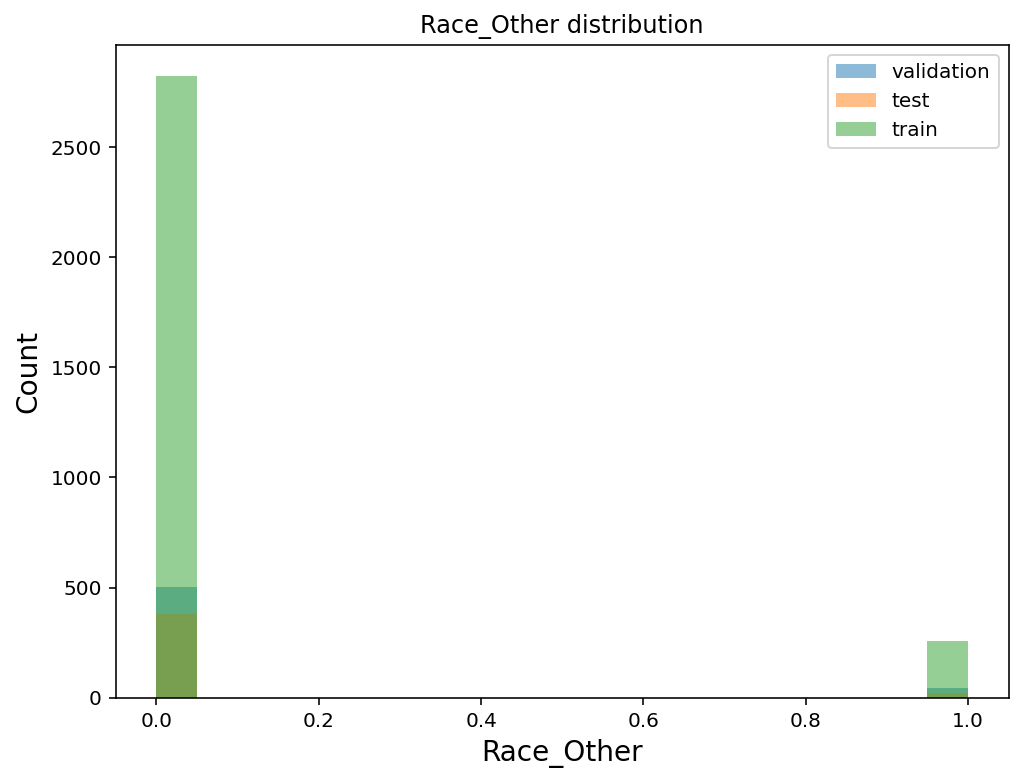

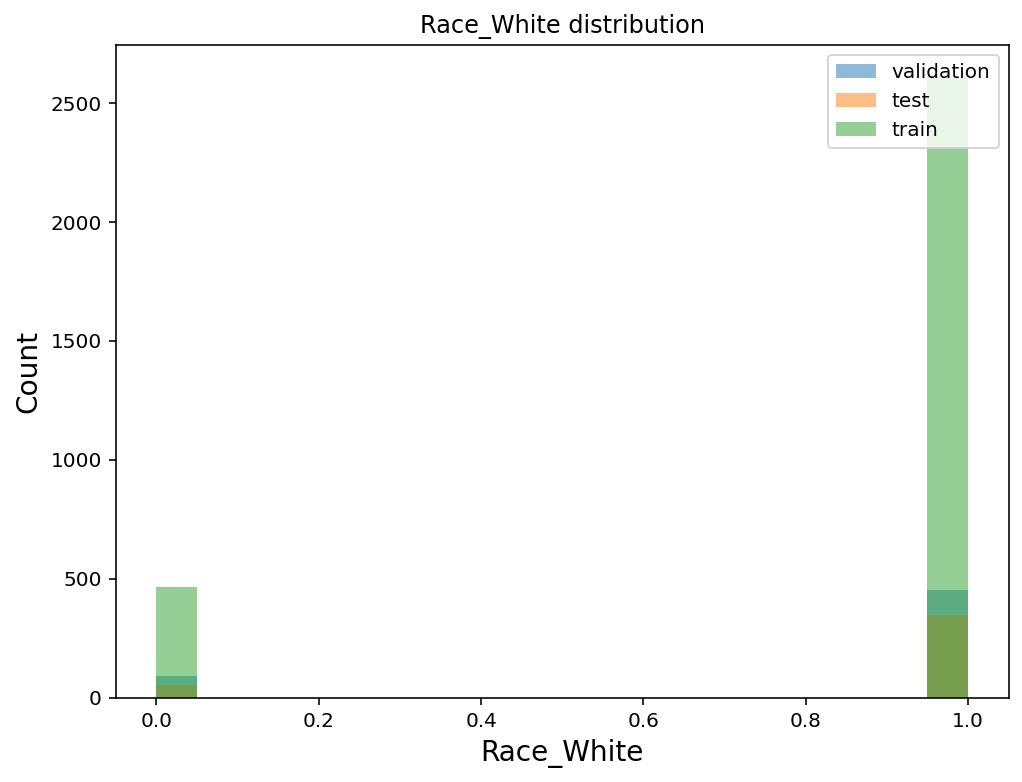

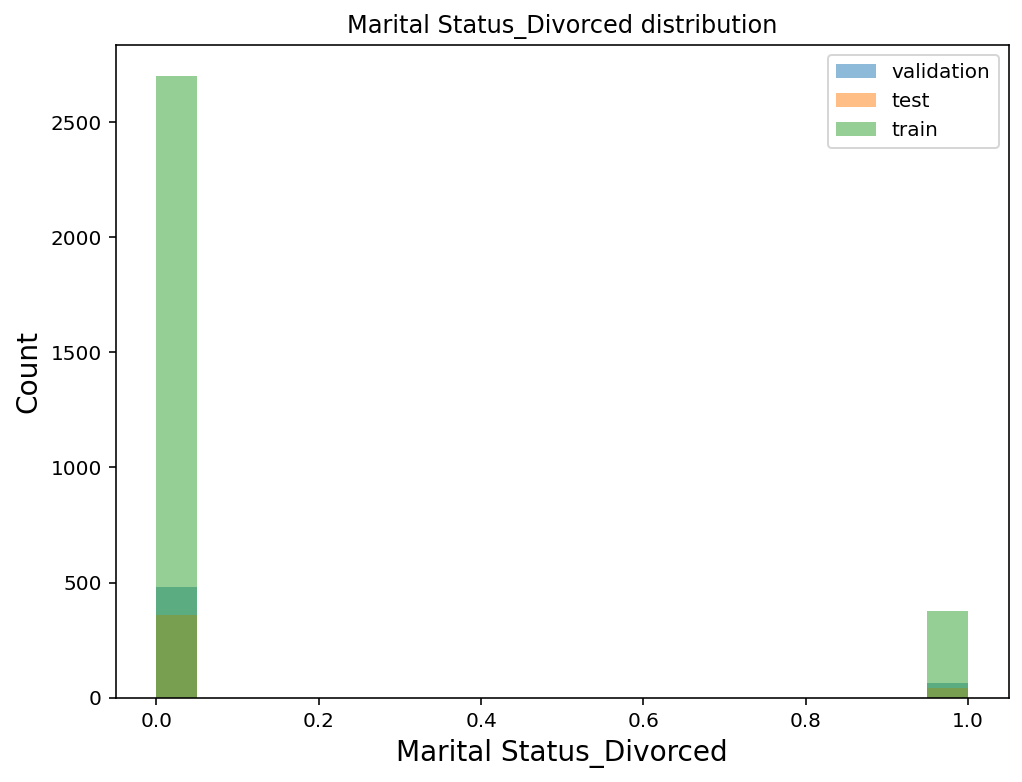

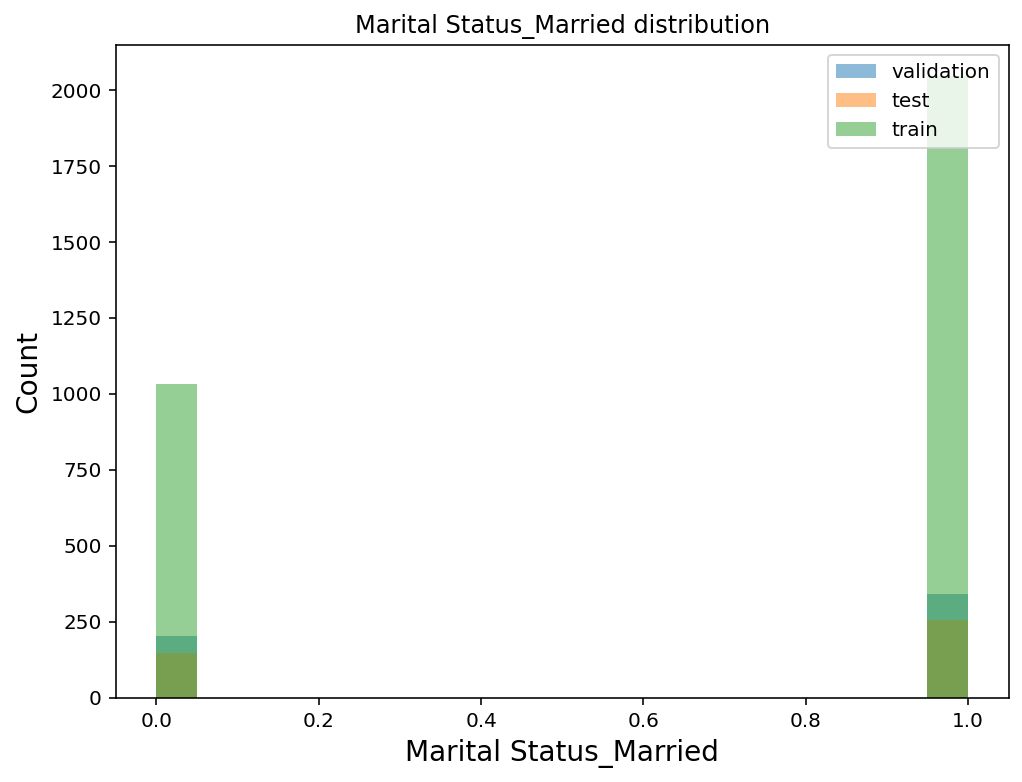

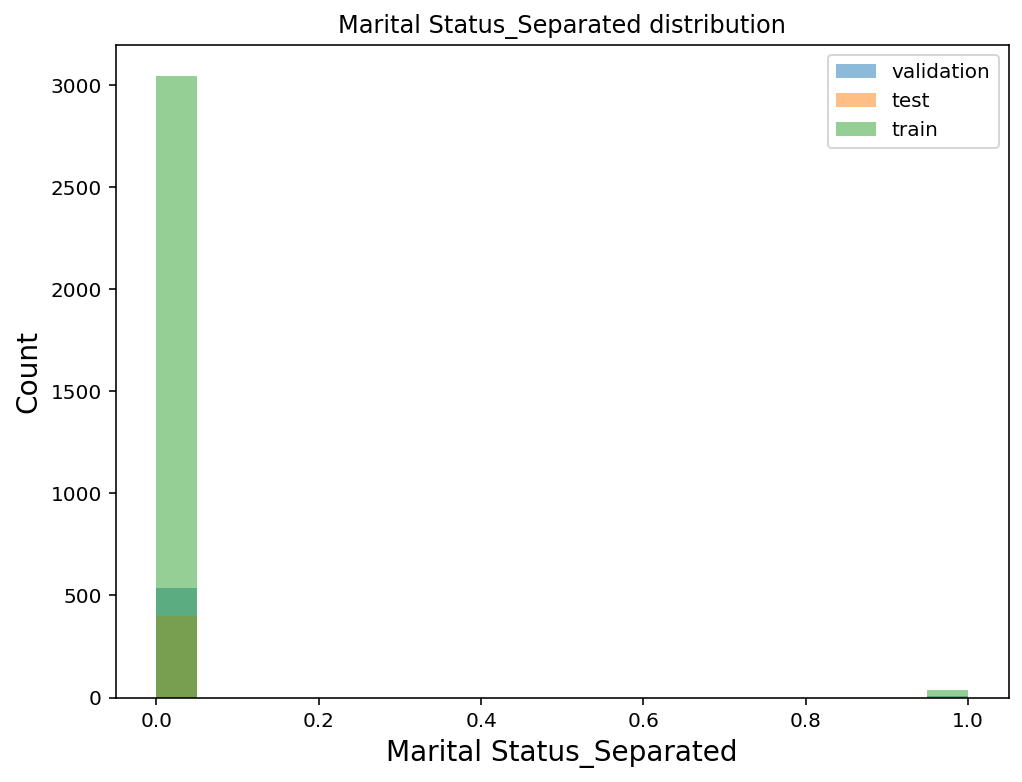

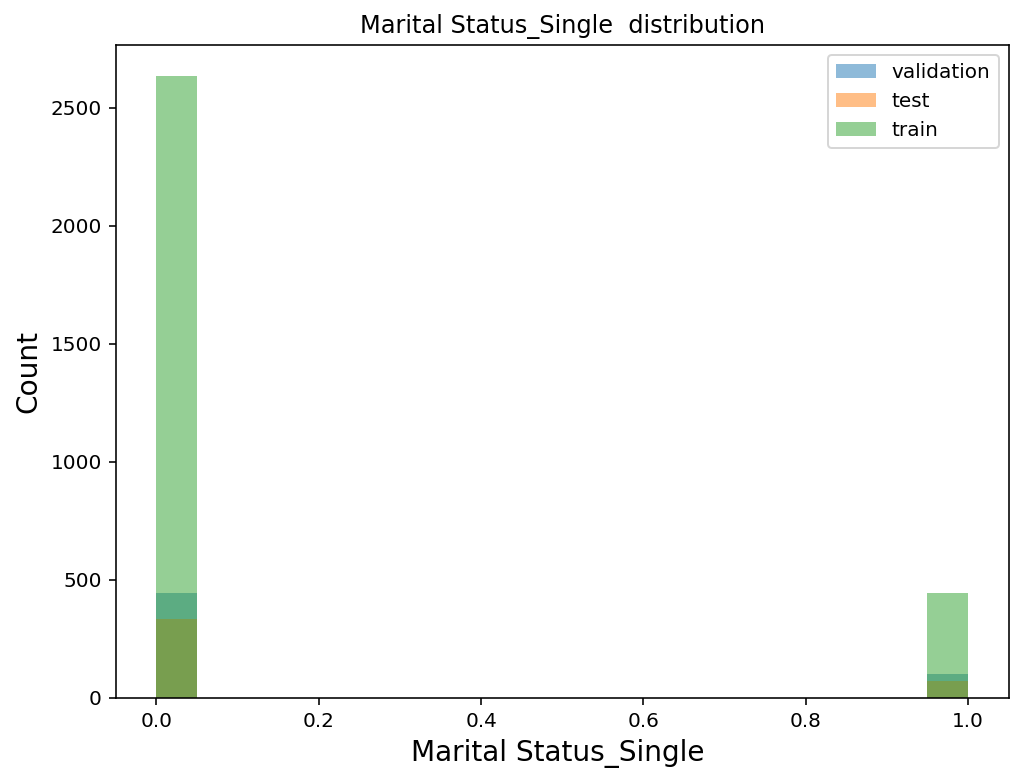

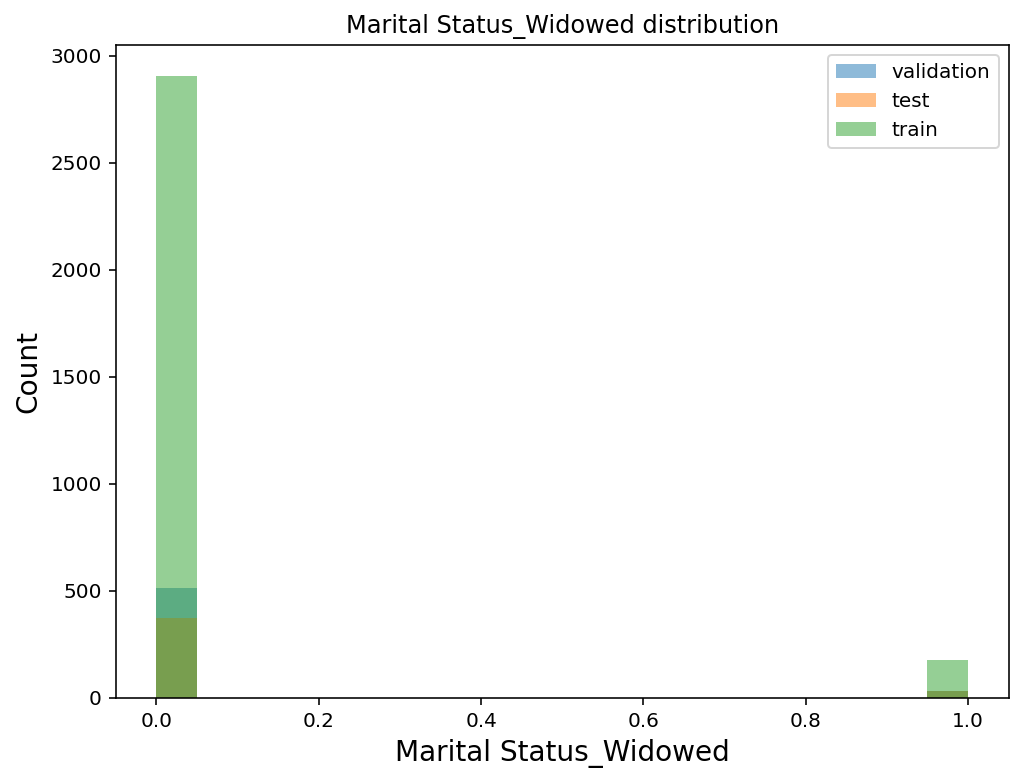

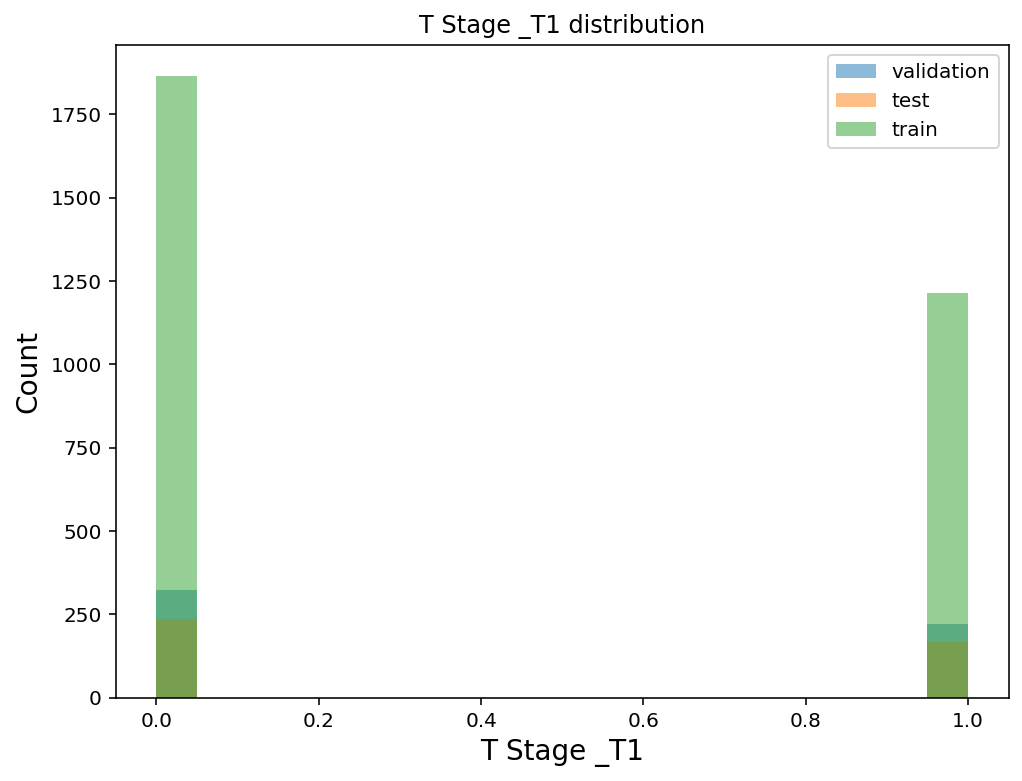

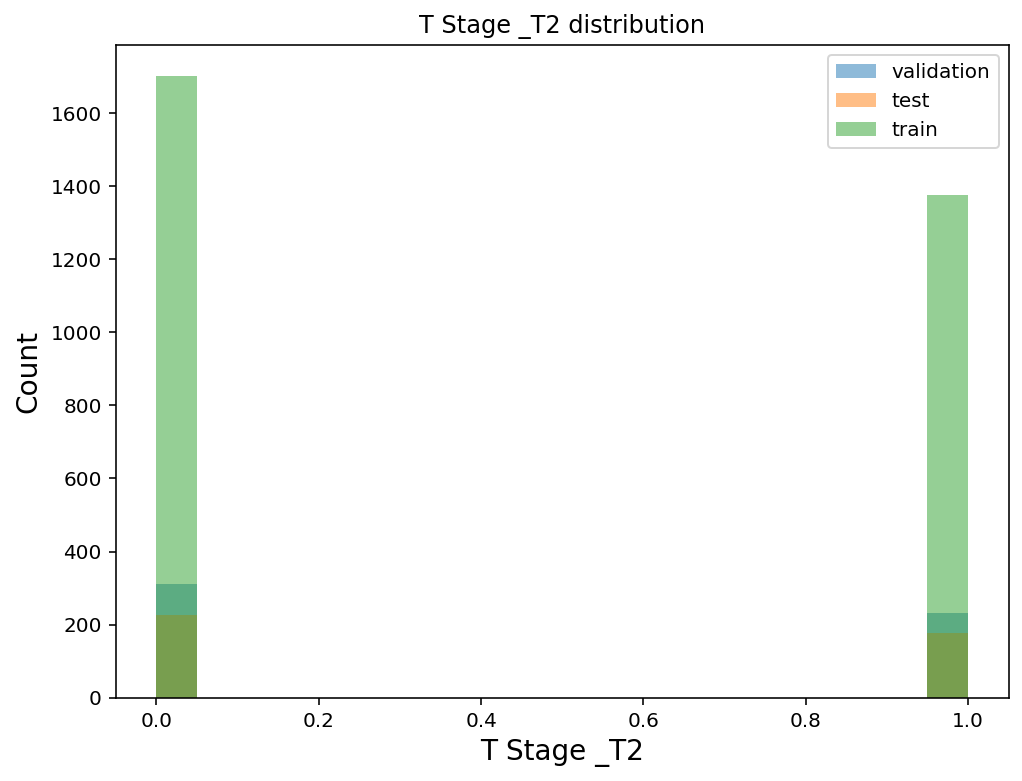

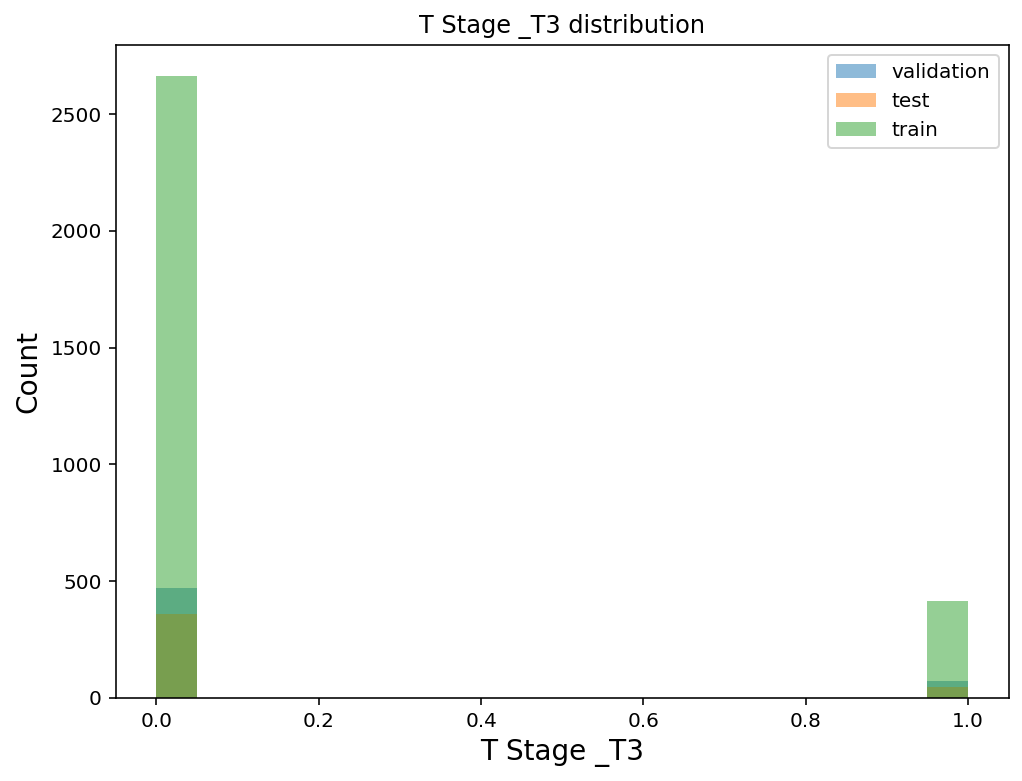

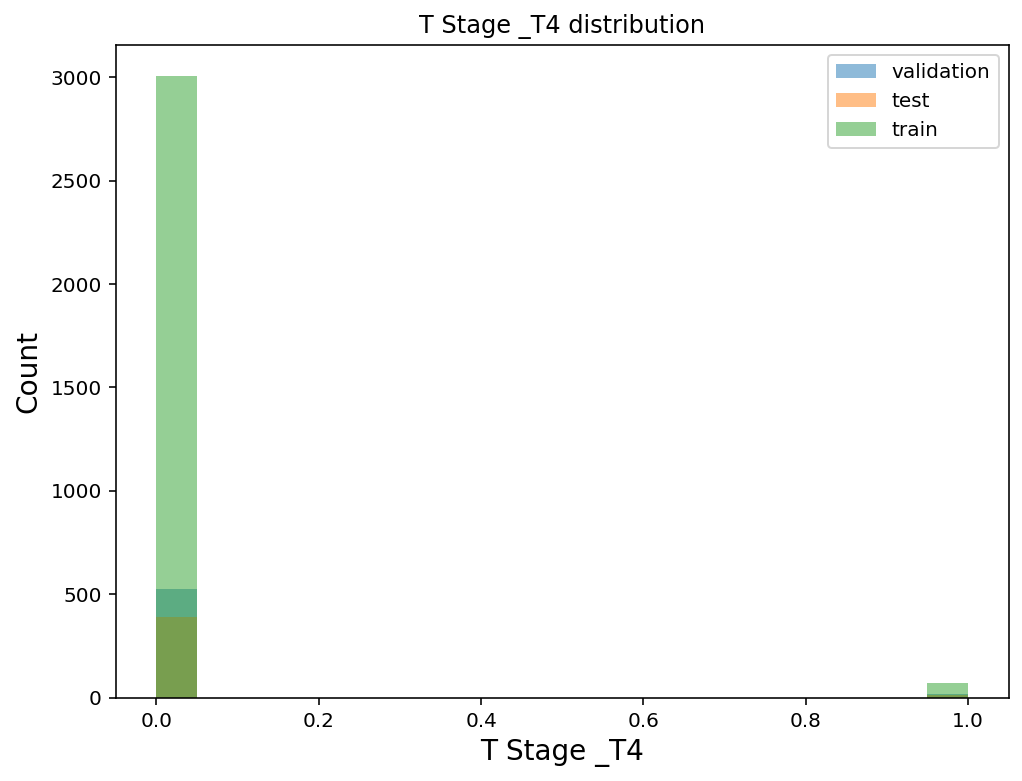

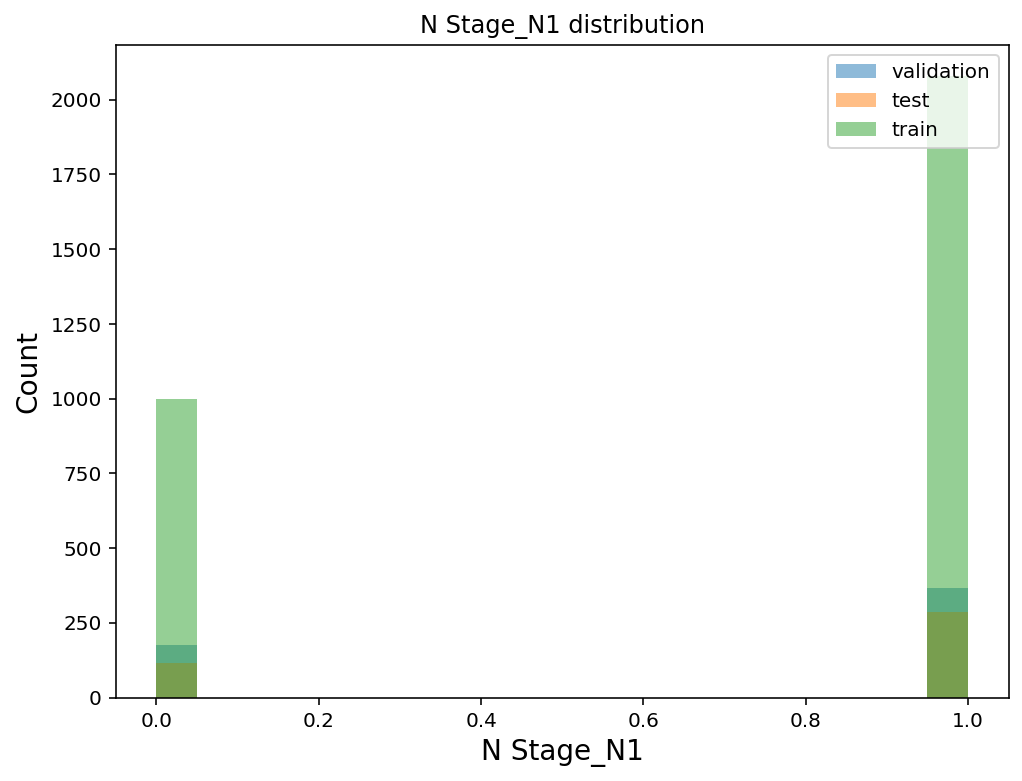

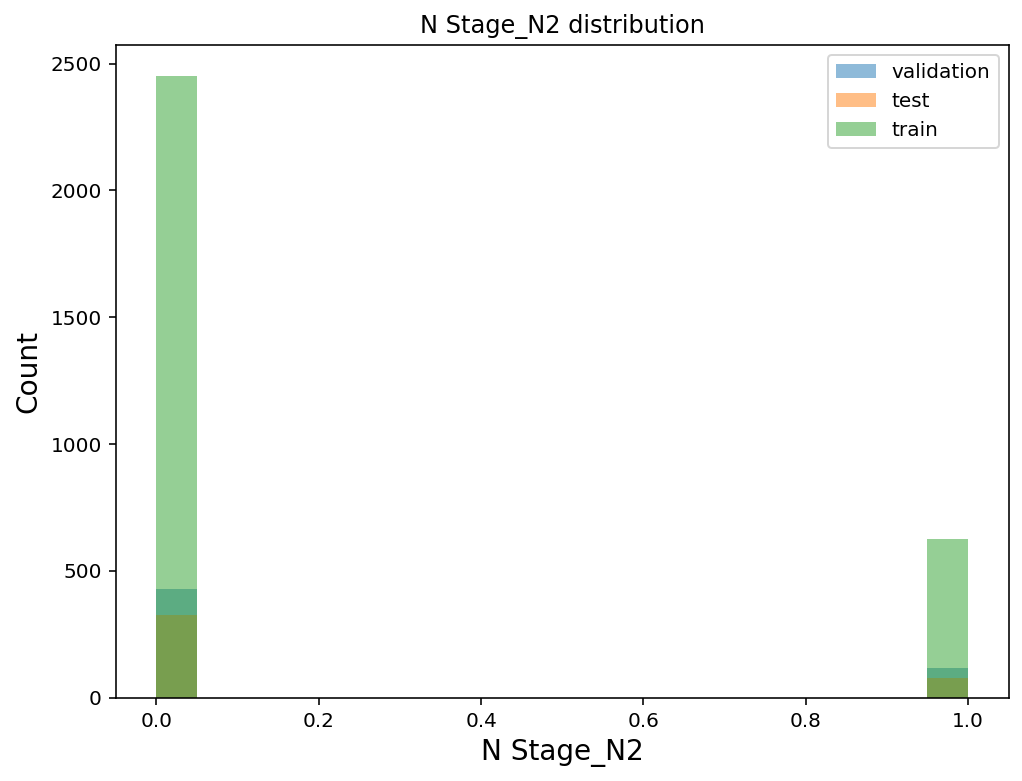

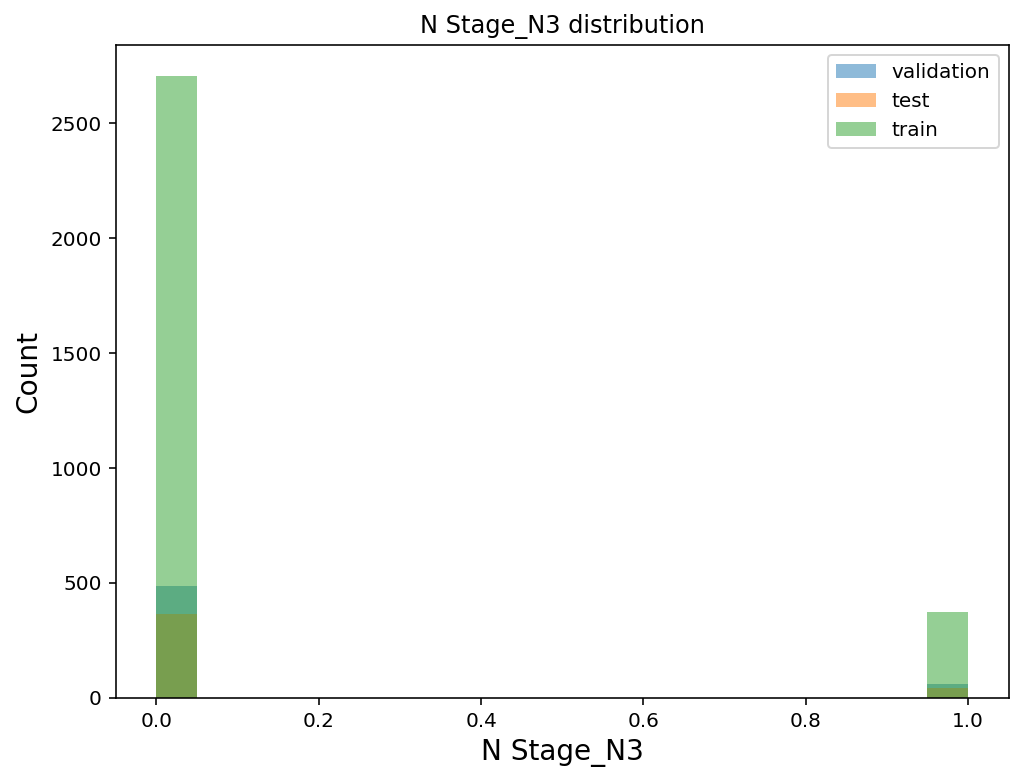

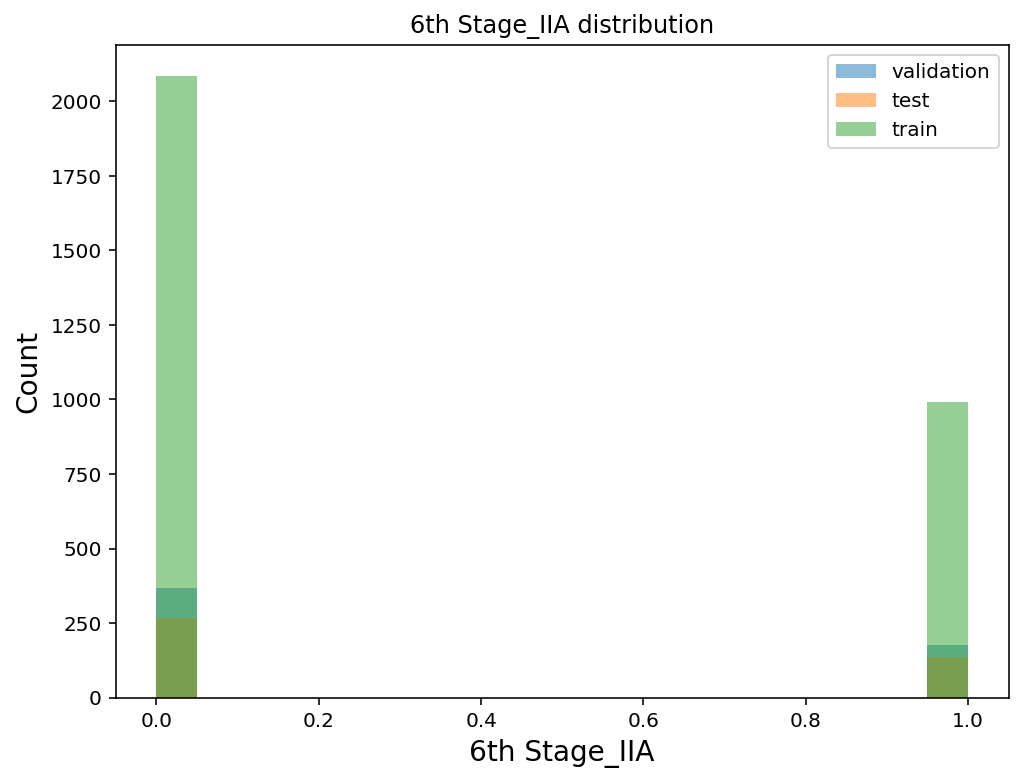

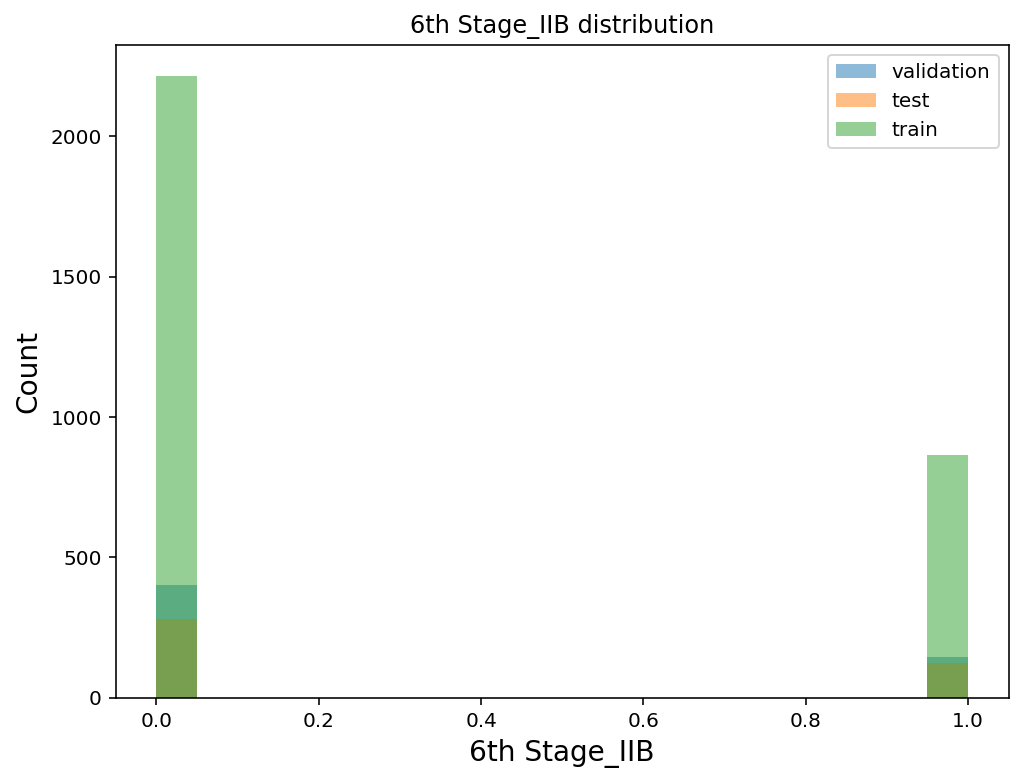

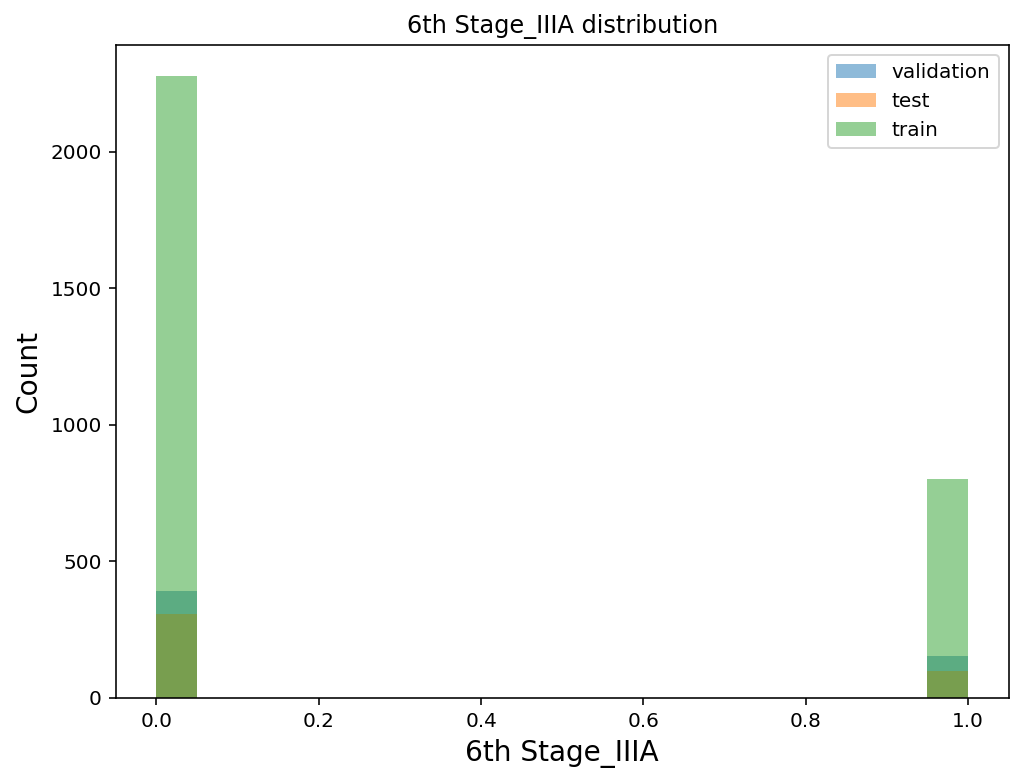

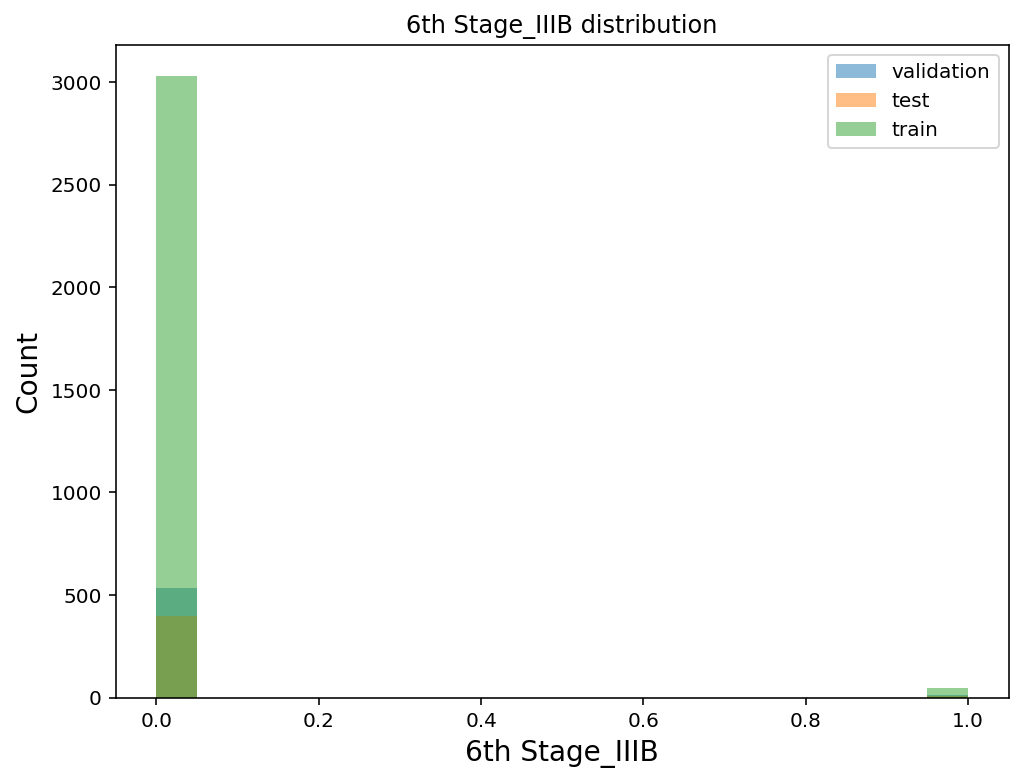

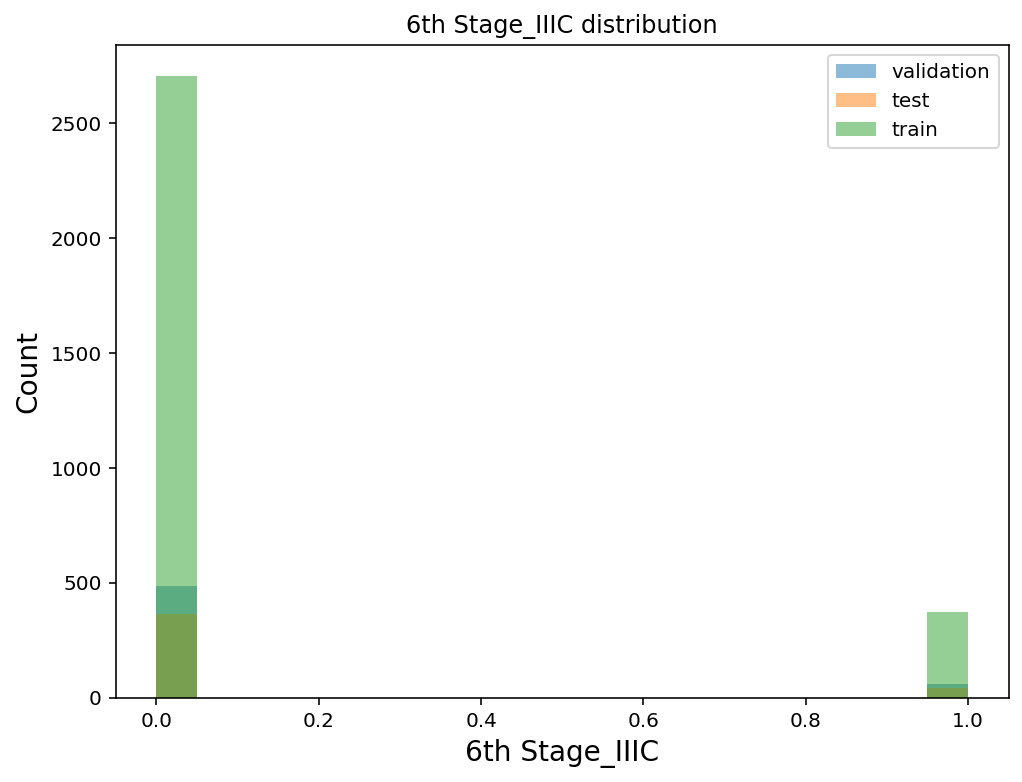

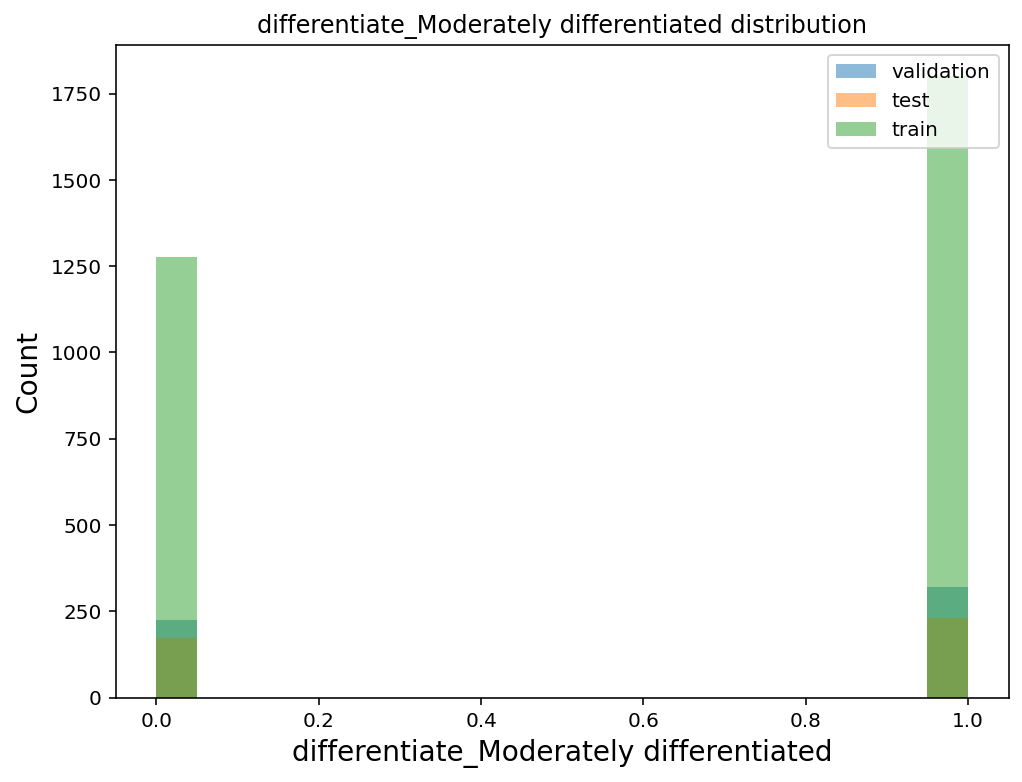

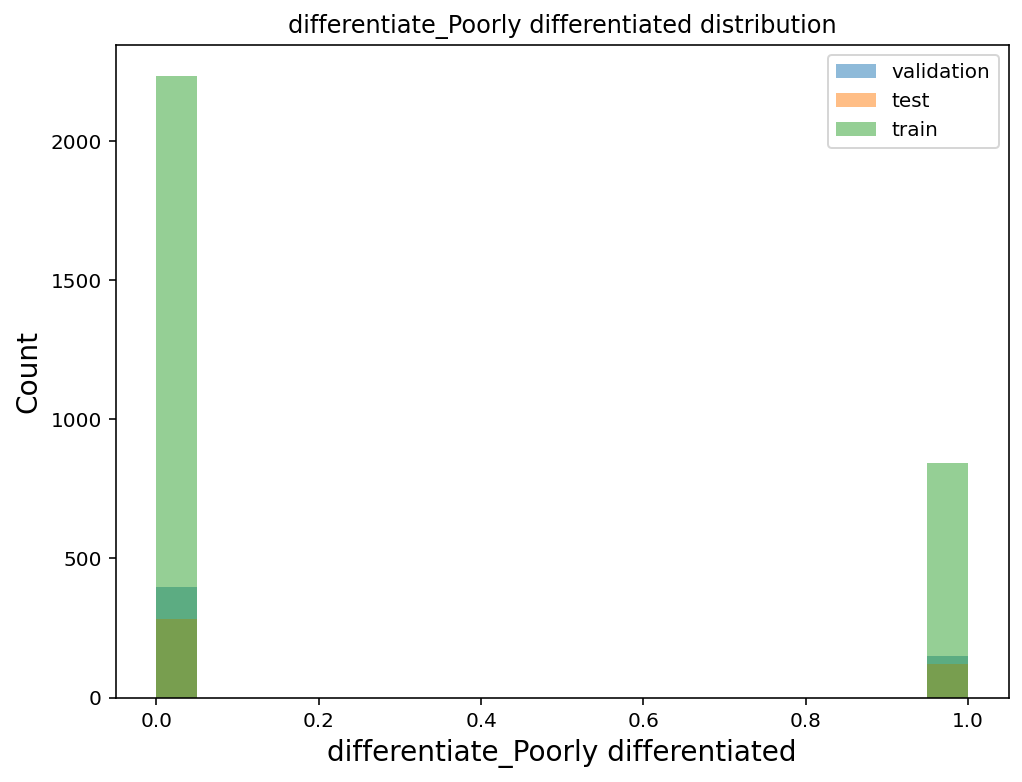

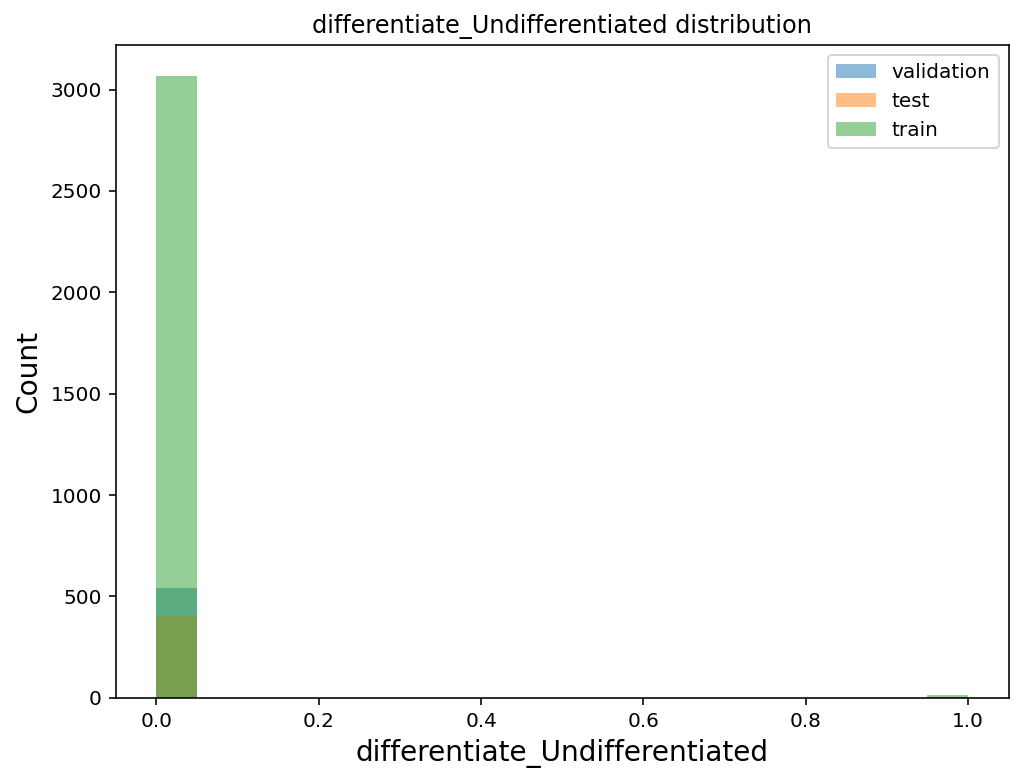

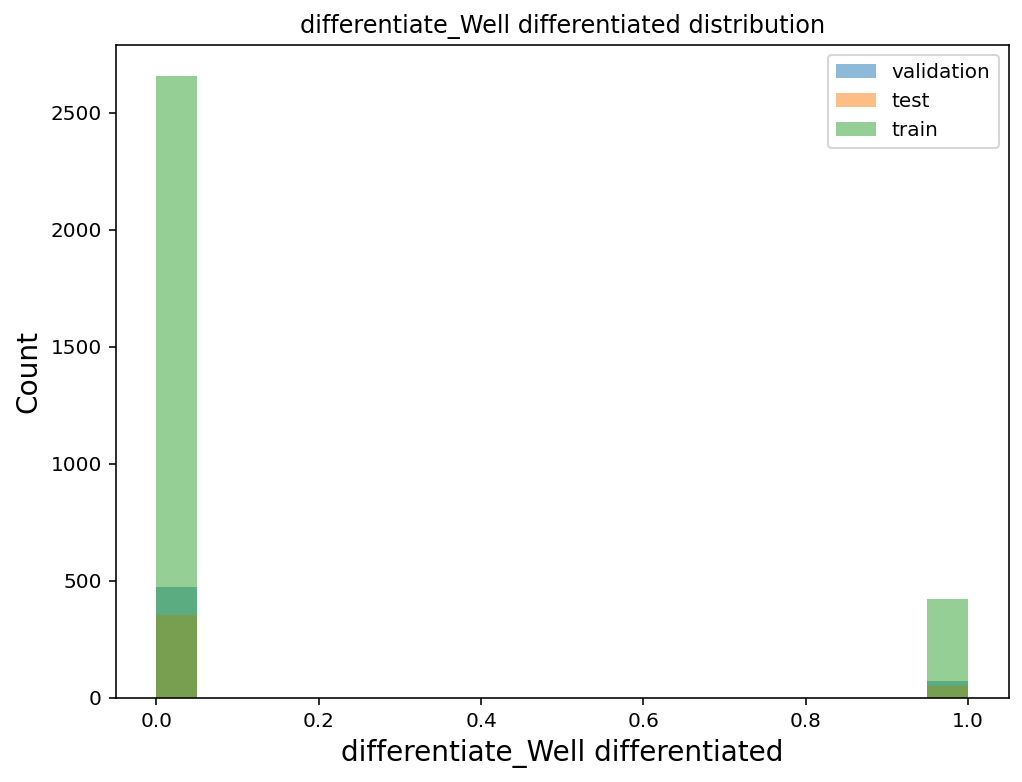

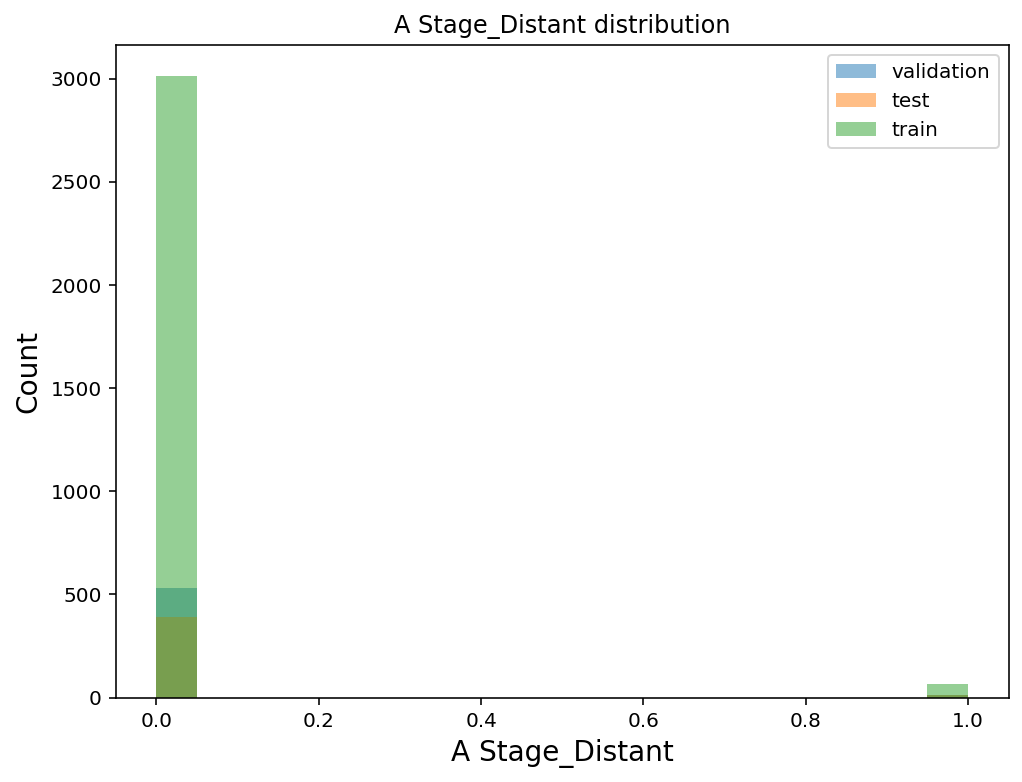

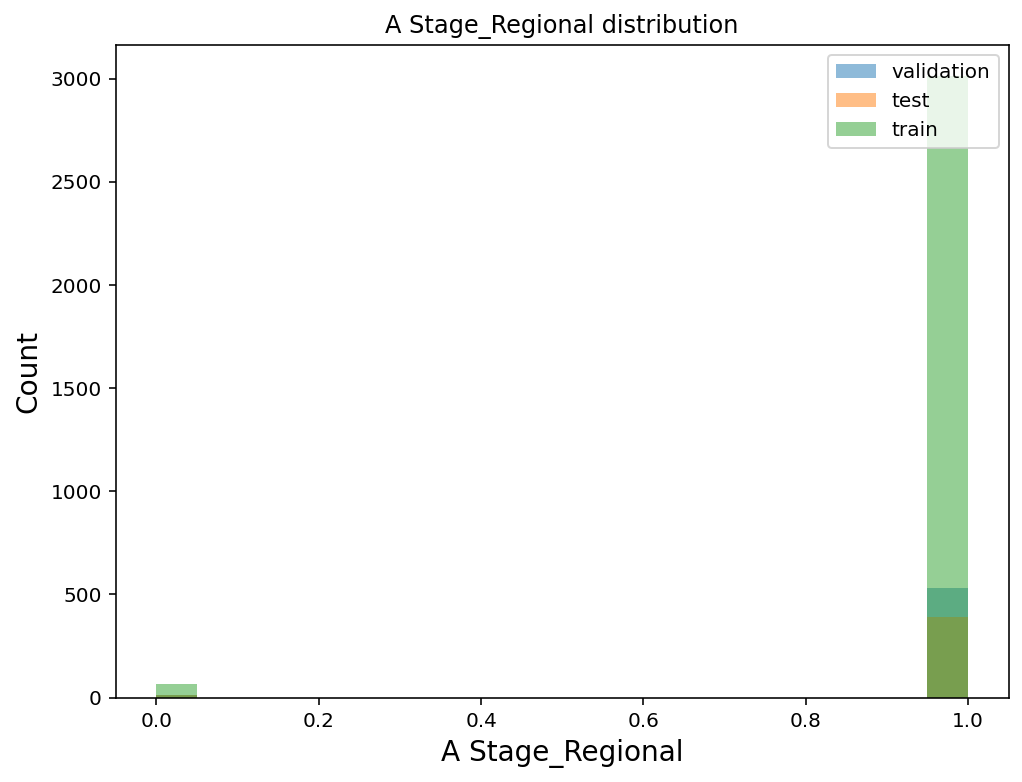

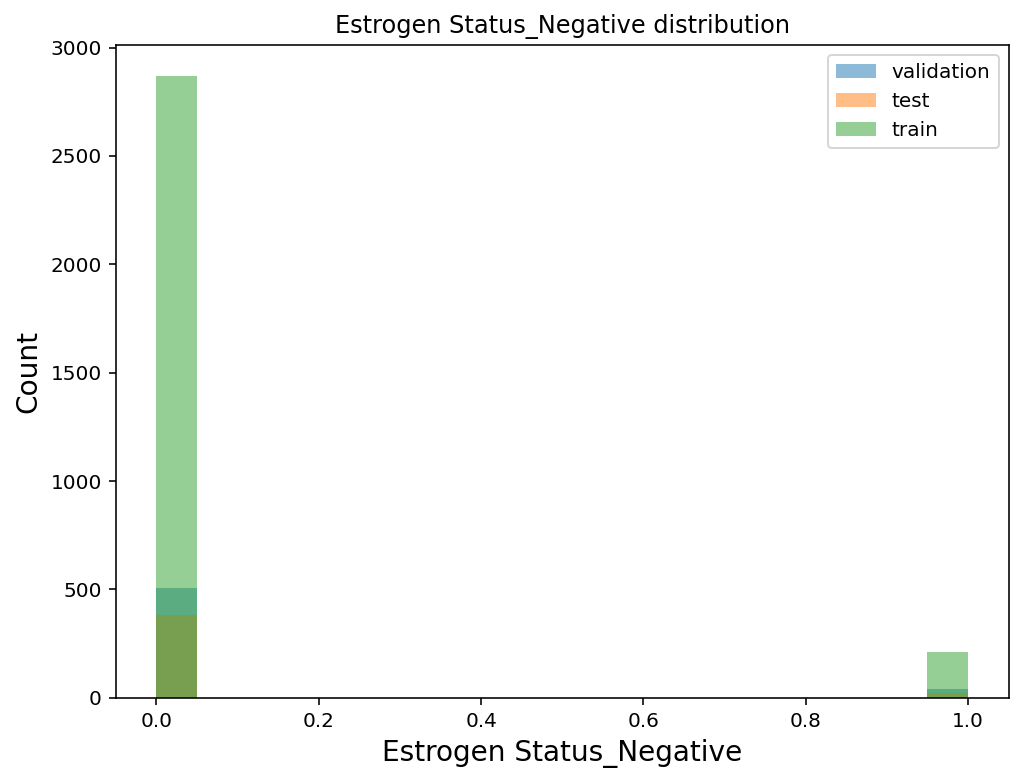

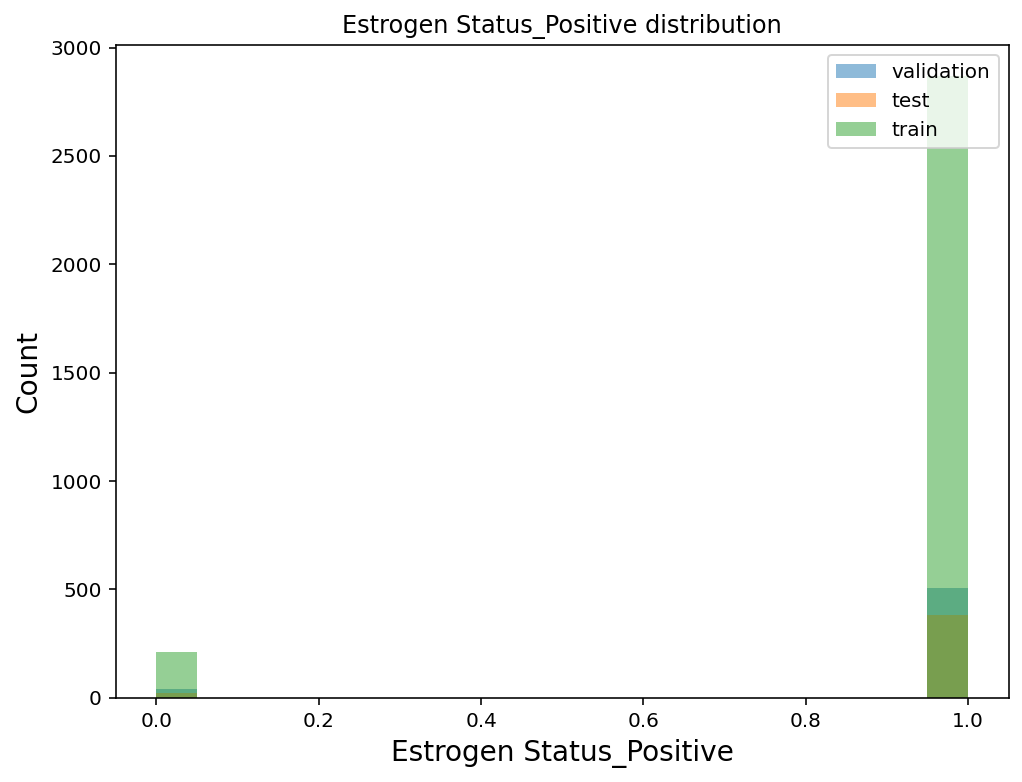

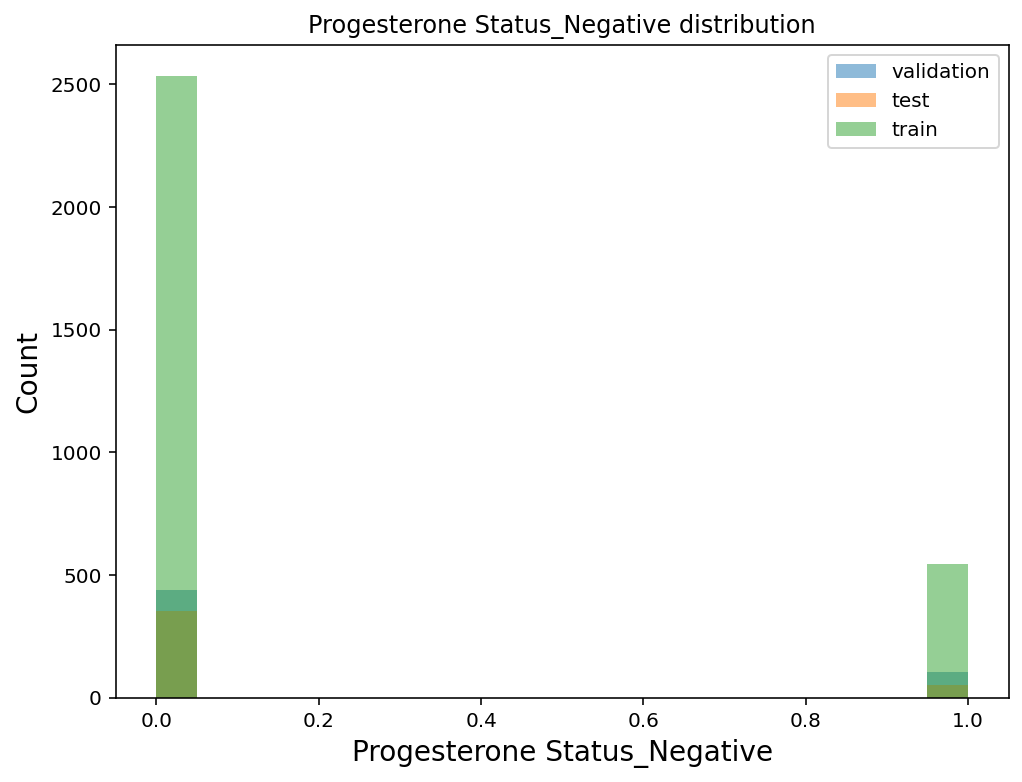

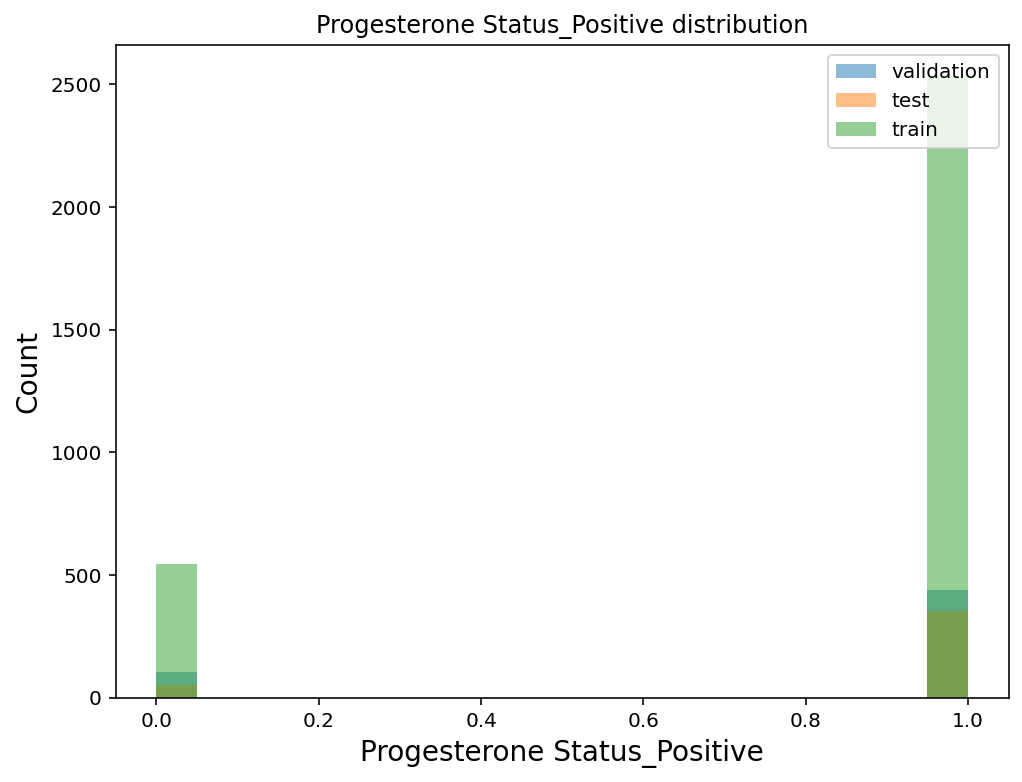

In [44]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]

X_val_plot = X_val[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]

X_train_plot = X_train[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 


***Linear Regression***

In [45]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

***Making Predictions***

In [46]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.31
R^2 score on tarining set = 0.30567480821976023


In [47]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.26
R^2 score on test set = 0.26131191353236727


In [48]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.09
Coefficient of determination: 0.33
R^2 score on validation set = 0.3333298869878637


In [49]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# ***Answer the Following Questions***

1. What are the data types?
Ans: Numerical and Categorical

2. Are there missing values? Ans: No, there are not.

3. What are the likely distributions of the numeric values?
Ans: Age, Tumor Size and Regional Node Examined follow a normal distribution. Regional Node Positive follows a log-normal distribution.

4. Which independent variables are useful to predict a target(dependent variable)?

Ans: 1) p-value can be used to evaluate if an independent variable is important, it's more important if its p-value is lower. In my case, Age, Regional Node Examined, Regional Node Positive, Survival Months, Race_Other, Race_White, Marital Status_Married, T Stage T1, T Stage T2, N Stage N1, differentiate_Moderately differentiated, differentiate_Well differentiated, Grade I, Grade II, Estrogen Status_Positive, Progesterone Status_Positive are all important independent variables.

2) Permutation Importance also reflects the importance of different independent variables. It is aligned with p-value and thus shows the same important independent variables.

3) The absolute values of the coefficients of the independent variables also show the importance of them, for example, the coefficient of survival months has the largest absolute value, which means it's an important independent variable.

5. Whcih independent variable has missing values? How much?

Ans: No independent variables have missing values.

6. Do the training and test set have the same data?

Ans: Yes, we can tell from the histograms showing the distribution of training and test data. Most of the data are the same, except for some boundary data is only included in training set but not in test set.

7. In the predictor variables independent of all the other predictor variables?

Ans: No, they are not all independent, although most of them are independent. According to the heatmap, correlation table and pair plot, we can see there are multi-collinearity among many independent variables. Some independent variables even indicate the same thing. And some independent variables are closely related to others.

8. Which predictor variables are the most important?

Ans: The most importance predictor variable is the survival months, because its p-value is 0.0 and it has greatest absolute value of its coefficient. It makes sense because the survival months are directly related to a patient's status, i.e., alive or dead.

9. Do the ranges of the predictor variables make sense?

Ans: Yes, the ranges make sense.
1. For age, all patients are at an age between 40-60, it makes sense because usually women at this age are more likely to have women diseases.
2. Tumor Size, there are some outliers in this predictor variable, which indicates some patients are diagnosed of breast cancer with extremely large tumor found. It makes sense because in some rare cases, extremely large tumor can happen to be found.
3. Regional Node Examined, there are some outliers in this predictor variable, showing that there are many more nodes found in certain region in a patient's breast. The outliers are higher than the average, but it can happen in real life, so the data makes sense.

4. Regional Node Positive, similar as Regional Node Examined, usually, more nodes found, more likely to find positive nodes. However, there are outliers indicating that some patients are in very bad condition, i.e., many nodes found in their breasts are positive. It is very unfortunate but it could happen and the data makes sense.

10. What are the distributions of the predictor variables?

Ans: According to the QQ Plot, Age, Tumor Size, Regional Node Examined roughly follow a normal distribution. As for the regional node positive, it roughly follows a log-normal ditribution since the log value of the predictor variable follows a normal distribution.

11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Ans: The ouliers in my case are not wrong data. So removing them will have a bad effect on final predictive model. With the outliers, the model can be trained to be more robust and can deal with extreme circumstances better. Although removing outliers may lead to a better result on average inputs, but it will perform very poorly on thoses rare circumstances. 

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [50]:
# Randomly Remove 10% data
import pandas as pd
import numpy as np

p = 0.1 #percentage missing data required

data = pd.read_csv("Breast_Cancer.csv")
data = pd.get_dummies(data)
# print(data)
mask = np.random.choice([True, False], size = data.shape, p = [p, 1 - p])
new_df = data.mask(mask)
print(new_df)

       Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     68.0         4.0                    24.0                    1.0   
1     50.0        35.0                    14.0                    5.0   
2      NaN        63.0                     NaN                    7.0   
3     58.0        18.0                     2.0                    1.0   
4     47.0        41.0                     3.0                    1.0   
...    ...         ...                     ...                    ...   
4019  62.0         9.0                     NaN                    1.0   
4020  56.0        46.0                    14.0                    8.0   
4021  68.0        22.0                    11.0                    3.0   
4022  58.0        44.0                    11.0                    1.0   
4023  46.0         NaN                     7.0                    2.0   

      Survival Months  Race_Black  Race_Other  Race_White  \
0                60.0         0.0         0.0         1.0   
1

In [51]:
#Apply Mean imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())

# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.781e+30
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:39:49   Log-Likelihood:                      1.2559e+05
No. Observations:                4024   AIC:                                 -2.511e+05
Df Residuals:                    3983   BIC:                                 -2.508e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
result_d = pd.get_dummies(result)
col = data.columns

# print(col)
for i in range(len(col)):
  c = col[i]
  if c != 'Age' and c != 'Tumor Size' and c != 'Regional Node Examined' and c != 'Reginol Node Positive' and c != 'Survival Months':
    # continue
    # index = col.index(c)
    # print(index)
    y_true = data[c].values.tolist()
    y_hat = result_d[i].values.tolist()
    # print(y_hat)
    for j in range(len(y_hat)):
      y_hat[j] = int(y_hat[j])
    # print(y_hat)
    matrix = cm(y_true, y_hat)
    m_list = matrix.tolist()
    acc = asc(y_true, y_hat) * 100
    print(c)
    print(matrix)
    print("Accuracy:", acc)

Race_Black
[[3733    0]
 [  35  256]]
Accuracy: 99.13021868787276
Race_Other
[[3704    0]
 [  32  288]]
Accuracy: 99.20477137176938
Race_White
[[ 611    0]
 [ 318 3095]]
Accuracy: 92.09741550695824
Marital Status_Divorced
[[3538    0]
 [  64  422]]
Accuracy: 98.40954274353876
Marital Status_Married
[[1381    0]
 [ 275 2368]]
Accuracy: 93.16600397614314
Marital Status_Separated
[[3979    0]
 [   6   39]]
Accuracy: 99.85089463220676
Marital Status_Single 
[[3409    0]
 [  63  552]]
Accuracy: 98.43439363817097
Marital Status_Widowed
[[3789    0]
 [  29  206]]
Accuracy: 99.27932405566601
T Stage _T1
[[2421    0]
 [ 160 1443]]
Accuracy: 96.02385685884693
T Stage _T2
[[2238    0]
 [ 179 1607]]
Accuracy: 95.55168986083498
T Stage _T3
[[3491    0]
 [  46  487]]
Accuracy: 98.8568588469185
T Stage _T4
[[3922    0]
 [   8   94]]
Accuracy: 99.80119284294234
N Stage_N1
[[1292    0]
 [ 259 2473]]
Accuracy: 93.56361829025846
N Stage_N2
[[3204    0]
 [  68  752]]
Accuracy: 98.31013916500993
N Stage_N3

In [57]:
#Calculate bias and variance of original dataset
!pip install mlxtend==0.19.0
# print(mlxtend.__version__)
from mlxtend.evaluate import bias_variance_decomp

dataframe = pd.read_csv('Breast_Cancer.csv')
dataframe = pd.get_dummies(dataframe)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
MSE: 0.091
Bias: 0.090
Variance: 0.001


In [59]:
# Calculate bias and var for imputing 10% missing data with mean imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.087
Bias: 0.086
Variance: 0.001


In [60]:
#Apply Median imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.826e+31
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:47:51   Log-Likelihood:                      1.3021e+05
No. Observations:                4024   AIC:                                 -2.603e+05
Df Residuals:                    3983   BIC:                                 -2.601e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  4   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0  10 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0  98]]
Accuracy: 89.38866799204771
Tumor Size
[[7 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]
Accuracy: 90.48210735586481
Regional Node Examined
[[ 86   0   0 ...   0   0   0]
 [  0 119   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 89.93538767395626
Reginol Node Positive
[[1385  137    0 ...    0    0    0]
 [   0  740    0 ...    0    0    0]
 [   0   38  382 ...    0    0    0]
 ...
 [   0    2    0 ...    0    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 92.44532803180915
Survival Months
[[ 1  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...


In [62]:
# Calculate bias and var for imputing 10% missing data with median imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.089
Bias: 0.087
Variance: 0.002


In [63]:
#Apply Most Frequent imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.583e+30
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:48:41   Log-Likelihood:                      1.2891e+05
No. Observations:                4024   AIC:                                 -2.577e+05
Df Residuals:                    3983   BIC:                                 -2.575e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  4   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0  10 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0  98]]
Accuracy: 89.48807157057655
Tumor Size
[[7 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]
Accuracy: 90.38270377733598
Regional Node Examined
[[ 86   0   0 ...   0   0   0]
 [  0 119   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 90.03479125248509
Reginol Node Positive
[[1522    0    0 ...    0    0    0]
 [  67  673    0 ...    0    0    0]
 [  38    0  382 ...    0    0    0]
 ...
 [   2    0    0 ...    0    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 94.18489065606362
Survival Months
[[ 1  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...


In [65]:
# Calculate bias and var for imputing 10% missing data with most frequent imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.088
Bias: 0.087
Variance: 0.002


Remove 5% Data

In [66]:
# Randomly Remove 5% data
import pandas as pd
import numpy as np

p = 0.05 #percentage missing data required

data = pd.read_csv("Breast_Cancer.csv")
data = pd.get_dummies(data)
# print(data)
mask = np.random.choice([True, False], size = data.shape, p = [p, 1 - p])
new_df = data.mask(mask)
print(new_df)

       Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     68.0         4.0                    24.0                    1.0   
1      NaN        35.0                    14.0                    5.0   
2     58.0        63.0                    14.0                    7.0   
3     58.0        18.0                     2.0                    1.0   
4     47.0        41.0                     3.0                    1.0   
...    ...         ...                     ...                    ...   
4019  62.0         9.0                     1.0                    1.0   
4020  56.0        46.0                    14.0                    8.0   
4021  68.0        22.0                    11.0                    3.0   
4022  58.0        44.0                    11.0                    1.0   
4023  46.0        30.0                     7.0                    2.0   

      Survival Months  Race_Black  Race_Other  Race_White  \
0                60.0         0.0         0.0         1.0   
1

In [67]:
#Apply Mean imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.300e+30
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:49:21   Log-Likelihood:                      1.2495e+05
No. Observations:                4024   AIC:                                 -2.498e+05
Df Residuals:                    3983   BIC:                                 -2.495e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
result_d = pd.get_dummies(result)
col = data.columns
# print(col)
for i in range(len(col)):
  c = col[i]
  if c != 'Age' and c != 'Tumor Size' and c != 'Regional Node Examined' and c != 'Reginol Node Positive' and c != 'Survival Months':
    # continue
    # index = col.index(c)
    # print(index)
    y_true = data[c].values.tolist()
    y_hat = result_d[i].values.tolist()
    # print(y_hat)
    for j in range(len(y_hat)):
      y_hat[j] = int(y_hat[j])
    # print(y_hat)
    matrix = cm(y_true, y_hat)
    m_list = matrix.tolist()
    acc = asc(y_true, y_hat) * 100
    print(c)
    print(matrix)
    print("Accuracy:", acc)

Race_Black
[[3733    0]
 [  15  276]]
Accuracy: 99.6272365805169
Race_Other
[[3704    0]
 [  20  300]]
Accuracy: 99.50298210735586
Race_White
[[ 611    0]
 [ 163 3250]]
Accuracy: 95.9493041749503
Marital Status_Divorced
[[3538    0]
 [  26  460]]
Accuracy: 99.35387673956262
Marital Status_Married
[[1381    0]
 [ 108 2535]]
Accuracy: 97.31610337972168
Marital Status_Separated
[[3979    0]
 [   2   43]]
Accuracy: 99.95029821073558
Marital Status_Single 
[[3409    0]
 [  23  592]]
Accuracy: 99.42842942345924
Marital Status_Widowed
[[3789    0]
 [  13  222]]
Accuracy: 99.67693836978131
T Stage _T1
[[2421    0]
 [  83 1520]]
Accuracy: 97.93737574552684
T Stage _T2
[[2238    0]
 [  99 1687]]
Accuracy: 97.53976143141153
T Stage _T3
[[3491    0]
 [  17  516]]
Accuracy: 99.57753479125249
T Stage _T4
[[3922    0]
 [   4   98]]
Accuracy: 99.90059642147118
N Stage_N1
[[1292    0]
 [ 133 2599]]
Accuracy: 96.6948310139165
N Stage_N2
[[3204    0]
 [  43  777]]
Accuracy: 98.93141153081511
N Stage_N3
[

In [70]:
# Calculate bias and var for imputing 5% missing data with mean imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.085
Bias: 0.084
Variance: 0.001


In [71]:
#Apply Median imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.608e+31
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:51:10   Log-Likelihood:                      1.3094e+05
No. Observations:                4024   AIC:                                 -2.618e+05
Df Residuals:                    3983   BIC:                                 -2.615e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  4   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ... 113   0   0]
 [  0   0   0 ...   0 106   0]
 [  0   0   0 ...   0   0 103]]
Accuracy: 95.47713717693837
Tumor Size
[[ 6  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  5]]
Accuracy: 95.70079522862824
Regional Node Examined
[[ 88   0   0 ...   0   0   0]
 [  0 132   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 94.93041749502981
Reginol Node Positive
[[1438   84    0 ...    0    0    0]
 [   0  740    0 ...    0    0    0]
 [   0   13  407 ...    0    0    0]
 ...
 [   0    1    0 ...    1    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 95.8996023856859
Survival Months
[[ 0  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0

In [73]:
# Calculate bias and var for imputing 5% missing data with median imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.086
Bias: 0.084
Variance: 0.001


In [74]:
#Apply Most Frequent imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.819e+30
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:51:30   Log-Likelihood:                      1.2558e+05
No. Observations:                4024   AIC:                                 -2.511e+05
Df Residuals:                    3983   BIC:                                 -2.508e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  4   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ... 113   0   0]
 [  0   0   0 ...   0 106   0]
 [  0   0   0 ...   0   0 103]]
Accuracy: 95.45228628230616
Tumor Size
[[ 6  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  5]]
Accuracy: 95.72564612326043
Regional Node Examined
[[ 88   0   0 ...   0   0   0]
 [  0 132   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 95.10437375745528
Reginol Node Positive
[[1522    0    0 ...    0    0    0]
 [  42  698    0 ...    0    0    0]
 [  13    0  407 ...    0    0    0]
 ...
 [   1    0    0 ...    1    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 96.94333996023857
Survival Months
[[ 0  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  

In [77]:
# Calculate bias and var for imputing 5% missing data with most frequent imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.085
Bias: 0.084
Variance: 0.001


Randomly Remove 1% Data

In [78]:
# Randomly Remove 1% data
import pandas as pd
import numpy as np

p = 0.01 #percentage missing data required

data = pd.read_csv("Breast_Cancer.csv")
data = pd.get_dummies(data)
# print(data)
mask = np.random.choice([True, False], size = data.shape, p = [p, 1 - p])
new_df = data.mask(mask)
print(new_df)

       Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     68.0         4.0                    24.0                    1.0   
1     50.0        35.0                    14.0                    5.0   
2     58.0        63.0                    14.0                    NaN   
3     58.0        18.0                     2.0                    1.0   
4     47.0        41.0                     3.0                    1.0   
...    ...         ...                     ...                    ...   
4019  62.0         9.0                     1.0                    1.0   
4020  56.0        46.0                    14.0                    8.0   
4021  68.0        22.0                    11.0                    3.0   
4022  58.0        44.0                    11.0                    1.0   
4023  46.0        30.0                     7.0                    2.0   

      Survival Months  Race_Black  Race_Other  Race_White  \
0                60.0         0.0         0.0         1.0   
1

In [79]:
#Apply Mean imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.105e+31
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:52:01   Log-Likelihood:                      1.3053e+05
No. Observations:                4024   AIC:                                 -2.610e+05
Df Residuals:                    3983   BIC:                                 -2.607e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
# Calculate bias and var for imputing 1% missing data with mean imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.091
Bias: 0.090
Variance: 0.001


In [81]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
result_d = pd.get_dummies(result)
col = data.columns
# print(col)
for i in range(len(col)):
  c = col[i]
  if c != 'Age' and c != 'Tumor Size' and c != 'Regional Node Examined' and c != 'Reginol Node Positive' and c != 'Survival Months':
    # continue
    # index = col.index(c)
    # print(index)
    y_true = data[c].values.tolist()
    y_hat = result_d[i].values.tolist()
    # print(y_hat)
    for j in range(len(y_hat)):
      y_hat[j] = int(y_hat[j])
    # print(y_hat)
    matrix = cm(y_true, y_hat)
    m_list = matrix.tolist()
    acc = asc(y_true, y_hat) * 100
    print(c)
    print(matrix)
    print("Accuracy:", acc)

Race_Black
[[3733    0]
 [   2  289]]
Accuracy: 99.95029821073558
Race_Other
[[3704    0]
 [   3  317]]
Accuracy: 99.92544731610337
Race_White
[[ 611    0]
 [  33 3380]]
Accuracy: 99.17992047713717
Marital Status_Divorced
[[3538    0]
 [   2  484]]
Accuracy: 99.95029821073558
Marital Status_Married
[[1381    0]
 [  33 2610]]
Accuracy: 99.17992047713717
Marital Status_Separated
[[3979    0]
 [   0   45]]
Accuracy: 100.0
Marital Status_Single 
[[3409    0]
 [   6  609]]
Accuracy: 99.85089463220676
Marital Status_Widowed
[[3789    0]
 [   2  233]]
Accuracy: 99.95029821073558
T Stage _T1
[[2421    0]
 [  14 1589]]
Accuracy: 99.6520874751491
T Stage _T2
[[2238    0]
 [  26 1760]]
Accuracy: 99.35387673956262
T Stage _T3
[[3491    0]
 [   4  529]]
Accuracy: 99.90059642147118
T Stage _T4
[[3922    0]
 [   0  102]]
Accuracy: 100.0
N Stage_N1
[[1292    0]
 [  24 2708]]
Accuracy: 99.40357852882704
N Stage_N2
[[3204    0]
 [   7  813]]
Accuracy: 99.82604373757455
N Stage_N3
[[3552    0]
 [   3  46

In [82]:
#Apply Median imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.020e+31
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:52:23   Log-Likelihood:                      1.2907e+05
No. Observations:                4024   AIC:                                 -2.581e+05
Df Residuals:                    3983   BIC:                                 -2.578e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  5   0   0 ...   0   0   0]
 [  0  14   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ... 119   0   0]
 [  0   0   0 ...   0 111   0]
 [  0   0   0 ...   0   0 107]]
Accuracy: 99.05566600397614
Tumor Size
[[ 7  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  5]]
Accuracy: 98.98111332007953
Regional Node Examined
[[ 96   0   0 ...   0   0   0]
 [  0 137   0 ...   0   0   0]
 [  0   0 116 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 99.05566600397614
Reginol Node Positive
[[1503   19    0 ...    0    0    0]
 [   0  740    0 ...    0    0    0]
 [   0    8  412 ...    0    0    0]
 ...
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 98.8817097415507
Survival Months
[[ 1  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0

In [84]:
# Calculate bias and var for imputing 1% missing data with median imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.091
Bias: 0.090
Variance: 0.001


In [85]:
#Apply Most Frequent imputation for the missing data
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
# print(result)
result[0] = result[0].astype(int)
result[1] = result[1].astype(float)
result[2] = result[2].astype(int)
result[3] = result[3].astype(int)
result_d = pd.get_dummies(result)
d_col = result_d.columns.values.tolist()
# d_col.remove(39)
# d_col.remove(40)
model = sm.OLS(result_d[39], result_d[d_col]).fit()
print(model.summary())
# result = imp.transform(new_df)

                                 OLS Regression Results                                
Dep. Variable:                     39   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.204e+30
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        01:53:00   Log-Likelihood:                      1.2477e+05
No. Observations:                4024   AIC:                                 -2.495e+05
Df Residuals:                    3983   BIC:                                 -2.492e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [86]:
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
col = data.columns.values.tolist()
col.remove('Status_Alive')
col.remove('Status_Dead')
for i in range(len(col)):
  c = col[i]
  y_true = data[c].values.tolist()

  # labels = []
  # # acc = []
  # for y in y_true:
  #   if y not in labels:
  #     labels.append(y)
  y_hat = result[i].values.tolist()
  matrix = cm(y_true, y_hat)
  m_list = matrix.tolist()
  acc = asc(y_true, y_hat) * 100
  print(c)
  print(matrix)
  print("Accuracy:", acc)

Age
[[  5   0   0 ...   0   0   0]
 [  0  14   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ... 119   0   0]
 [  0   0   0 ...   0 111   0]
 [  0   0   0 ...   0   0 107]]
Accuracy: 99.05566600397614
Tumor Size
[[ 7  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  5]]
Accuracy: 99.05566600397614
Regional Node Examined
[[ 96   0   0 ...   0   0   0]
 [  0 137   0 ...   0   0   0]
 [  0   0 116 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy: 99.03081510934393
Reginol Node Positive
[[1522    0    0 ...    0    0    0]
 [   8  732    0 ...    0    0    0]
 [   8    0  412 ...    0    0    0]
 ...
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
Accuracy: 99.15506958250498
Survival Months
[[ 1  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  

In [87]:
# Calculate bias and var for imputing 1% missing data with most frequent imputation
dataframe = pd.get_dummies(result)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-2], data[:, -2]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.091
Bias: 0.090
Variance: 0.001
